# Hotel Reviews - Text analytics


In [1]:
import pandas as pd
import numpy as np

**Import dataset**

In [2]:
data = pd.read_csv(r"D:\University\FINAL PROJECT 1\data set\All Reviews.csv",low_memory=False)
data.head()

,helpfulVotes,id,lang,locationId,ownerResponse,ownerResponse/connectionToSubject,ownerResponse/id,ownerResponse/lang,ownerResponse/publishedDate,ownerResponse/responder,...,photos/41/photoSizes/8/url,photos/41/photoSizes/8/width,photos/42/photoSizes/8/height,photos/42/photoSizes/8/url,photos/42/photoSizes/8/width,photos/43/photoSizes/8/height,photos/43/photoSizes/8/url,photos/43/photoSizes/8/width,error,input
0,0.0,950679198.0,en,496625.0,NaN,Owner,950837259.0,en,2024-05-14,Aitken Spence Hotel Management,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,946030726.0,en,496625.0,NaN,Owner,948184909.0,en,2024-04-24,Aitken Spence Hotel Management,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,941393826.0,en,496625.0,NaN,Owner,941629797.0,en,2024-03-10,Aitken Spence Hotel Management,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,934560907.0,en,496625.0,NaN,Owner,934743533.0,en,2024-01-19,Aitken Spence Hotel Management,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,927009082.0,en,496625.0,NaN,Owner,927791909.0,en,2023-11-29,Aitken Spence Hotel Management,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preprocessing 

**Keep the specified columns**

In [3]:
columns_to_keep = [
    'placeInfo/name','placeInfo/address','text', 'publishedDate','placeInfo/latitude','placeInfo/longitude','tripType','rating'
]
data = data[columns_to_keep]
data.head()

,placeInfo/name,placeInfo/address,text,publishedDate,placeInfo/latitude,placeInfo/longitude,tripType,rating
0,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",Staying at Heritance Ayurveda means absolute r...,2024-05-13,6.44704,79.98636,SOLO,5.0
1,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",I stayed there for a week and became friends w...,2024-04-09,6.44704,79.98636,FRIENDS,5.0
2,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",Paradise on the beach! All the staff is more t...,2024-03-08,6.44704,79.98636,COUPLES,5.0
3,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",My sincere thanks to Management & staff who tr...,2024-01-18,6.44704,79.98636,SOLO,4.0
4,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",This was my first experience of Ayurveda. I bo...,2023-11-23,6.44704,79.98636,SOLO,4.0


**Rename column names**

In [4]:
data = data.rename(columns={'placeInfo/address': 'Location'})
data = data.rename(columns={'placeInfo/name': 'Hotel names'})
data = data.rename(columns={'text': 'Reviews'})
data = data.rename(columns={'travelDate': 'Travel Date'})
data = data.rename(columns={'publishedDate': 'Published Date'})
data = data.rename(columns={'tripType': 'Trip Type'})
data = data.rename(columns={'rating': 'Rating'})
data = data.rename(columns={'placeInfo/latitude': 'Latitude'})
data = data.rename(columns={'placeInfo/longitude': 'Longitude'})
data.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating
0,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",Staying at Heritance Ayurveda means absolute r...,2024-05-13,6.44704,79.98636,SOLO,5.0
1,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",I stayed there for a week and became friends w...,2024-04-09,6.44704,79.98636,FRIENDS,5.0
2,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",Paradise on the beach! All the staff is more t...,2024-03-08,6.44704,79.98636,COUPLES,5.0
3,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",My sincere thanks to Management & staff who tr...,2024-01-18,6.44704,79.98636,SOLO,4.0
4,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",This was my first experience of Ayurveda. I bo...,2023-11-23,6.44704,79.98636,SOLO,4.0


In [5]:
# Count the number of unique hotels in the 'Hotel Names' column
unique_hotels_count = data['Hotel names'].nunique()

print(f"Number of unique hotels: {unique_hotels_count}")

Number of unique hotels: 741


**Find the Review Count of Each hotels**

In [6]:
review_counts = data['Hotel names'].value_counts()
review_counts

Hotel names
Cinnamon Lakeside Colombo      1748
Taj Samudra, Colombo           1234
Mahaweli Reach Hotel            806
Heritance Tea Factory           673
The Golden Crown Hotel          666
                               ... 
Primegate Villa                   1
Paddy House Villa Home Stay       1
T.K. Green Garden Hotel           1
Hotel Indaura                     1
Blue Whale Hotel                  1
Name: count, Length: 741, dtype: int64

In [12]:
output_path = r"D:\University\FINAL PROJECT 1\Research\review_counts.xlsx"
review_counts.to_excel(output_path, index=False)

print(f"File saved successfully to {output_path}")

File saved successfully to D:\University\FINAL PROJECT 1\Research\review_counts.xlsx


**Find the null values**

In [13]:
data.isnull().sum()

Hotel names         0
Location            0
Reviews           110
Published Date    110
Latitude            9
Longitude           9
Trip Type         121
Rating            110
dtype: int64

**Remove entire raws if Reviews column has null values**

In [14]:
data.dropna(subset = ['Reviews'], axis = 0,inplace = True)
data.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating
0,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",Staying at Heritance Ayurveda means absolute r...,2024-05-13,6.44704,79.98636,SOLO,5.0
1,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",I stayed there for a week and became friends w...,2024-04-09,6.44704,79.98636,FRIENDS,5.0
2,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",Paradise on the beach! All the staff is more t...,2024-03-08,6.44704,79.98636,COUPLES,5.0
3,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",My sincere thanks to Management & staff who tr...,2024-01-18,6.44704,79.98636,SOLO,4.0
4,Heritance Ayurveda,"Moragalla Beach, Beruwala 12070 Sri Lanka",This was my first experience of Ayurveda. I bo...,2023-11-23,6.44704,79.98636,SOLO,4.0


In [15]:
data.to_csv(r"D:\University\FINAL PROJECT 1\Research\Before cleaning.csv")


**Keep hotel names with more than 20 reviews**

In [17]:
# Step 2: Identify hotel names with occurrences less than 20
hotels_to_remove = review_counts[review_counts < 20].index

# Step 3: Remove rows where 'Hotel Names' is in the list of hotels to remove
data = data [~data ['Hotel names'].isin(hotels_to_remove)]
data.head() 

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating
8,The Steuart by Citrus,"45 Janadhipathi Mawatha, Colombo 01000 Sri Lanka",This pub has such a cozy and charming atmosphe...,2024-08-02,6.934025,79.842995,FRIENDS,5.0
9,The Steuart by Citrus,"45 Janadhipathi Mawatha, Colombo 01000 Sri Lanka",We had a great night steuart's restaurant. Bo...,2024-07-29,6.934025,79.842995,COUPLES,5.0
10,The Steuart by Citrus,"45 Janadhipathi Mawatha, Colombo 01000 Sri Lanka",Excellent and very friendly service I admire t...,2024-07-27,6.934025,79.842995,BUSINESS,5.0
11,The Steuart by Citrus,"45 Janadhipathi Mawatha, Colombo 01000 Sri Lanka",Absolutely terrible experience. Our family of ...,2024-05-04,6.934025,79.842995,FAMILY,1.0
12,The Steuart by Citrus,"45 Janadhipathi Mawatha, Colombo 01000 Sri Lanka",The hotel is in a great location for sites and...,2024-02-19,6.934025,79.842995,COUPLES,5.0


**Extracting all rows that have the same name as their neighbor**

In [18]:
import pandas as pd

# Assuming df is your DataFrame
df_sorted = data.sort_values(by=['Hotel names'])

# Identifying rows with the same hotel name as the previous row
df_sorted['same_as_previous'] = df_sorted['Hotel names'].eq(df_sorted['Hotel names'].shift())

# Extracting all rows that have the same name as their neighbor (either before or after)
same_name_df = df_sorted[df_sorted['same_as_previous'] | df_sorted['Hotel names'].eq(df_sorted['Hotel names'].shift(-1))]


In [19]:
# Dropping the helper column
df  = same_name_df.drop(columns=['same_as_previous'])
output_path = r"D:\University\FINAL PROJECT 1\Research\Hotel Reviews.csv"
df.to_csv(output_path, index=False)

print(f"File saved successfully to {output_path}")

File saved successfully to D:\University\FINAL PROJECT 1\Research\Hotel Reviews.csv


In [20]:
print(data .shape)

(30666, 8)


In [21]:
data.isnull().sum()

Hotel names       0
Location          0
Reviews           0
Published Date    0
Latitude          0
Longitude         0
Trip Type         8
Rating            0
dtype: int64

In [22]:
# Count the number of unique hotels in the 'Hotel Names' column
unique_hotels_count = df['Hotel names'].nunique()

print(f"Number of unique hotels: {unique_hotels_count}")

Number of unique hotels: 226


## Text preprocessing 

In [28]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

In [29]:
df= pd.read_csv(r'D:\University\FINAL PROJECT 1\Research\Hotel Reviews.csv')
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0


**Lowercasing**

In [30]:
df['Preprocessed_Reviews'] = df['Reviews'].astype(str).str.lower()
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time at the 98 acre resort. \nwe staye...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,we spent two delightful nights here as we cont...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,we had booked a premium mountain view room at ...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,much much overrated :(\nnever lived up to expe...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,the hotel is nicely located around the hilly m...


**Remove punctuations**

In [31]:
# Remove punctuations
import string
df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time at the 98 acre resort \nwe stayed...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,we spent two delightful nights here as we cont...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,we had booked a premium mountain view room at ...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,much much overrated \nnever lived up to expect...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,the hotel is nicely located around the hilly m...


**Remove stopwords**

In [42]:
import nltk
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords
from nltk.corpus import stopwords as nltk_stopwords

custom_stopwords = ['hotel','hotels','u', 'sri', 'sri lanka', 'lanka', 'lankan', 'ampara', 'anuradhapura', 'badulla', 'batticaloa', 'colombo', 'galle', 'gampaha', 'hambantota', 'Jaffna', 
                    'kalutara', 'kandy', 'kegalle', 'kilinochchi', 'kurunegala', 'mannar', 'matale', 'matara', 'monaragala', 'mullaitivu', 'nuwara eliya', 
                    'polonnaruwa', 'puttalam', 'ratnapura', 'trincomalee', 'vavuniya']

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Access spaCy's stopwords
spacy_stopwords = nlp.Defaults.stop_words

# Combine all stopwords from NLTK, spaCy, and scikit-learn into one set, but exclude 'to'
combined_stopwords = set(nltk_stopwords.words('english')).union(spacy_stopwords).union(sklearn_stopwords).union(custom_stopwords)

# Remove 'to' from the stopwords list
combined_stopwords.discard('to')

# Function to remove stopwords from a single review
def remove_stopwords(text):
    # Tokenize the review text
    tokens = text.split()
    
    # Filter out the stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in combined_stopwords]
    
    # Join tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the function to the 'Preprocessed_Reviews' column in the DataFrame
df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_stopwords)
df.head()



,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time 98 acre resort stayed 2 nights ho...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room 98 acres 3 n...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Removing person's names**

In [43]:
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

def remove_person_names(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.ent_type_ != 'PERSON']
    return ' '.join(filtered_tokens)

# Apply the function to the DataFrame
df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_person_names)
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time 98 acre resort stayed 2 nights ho...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room 98 acres 3 n...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Removal of emojis**

In [44]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_emojis)
df.head()


,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time 98 acre resort stayed 2 nights ho...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room 98 acres 3 n...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Removal of emoticons**

In [45]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF'
                                  u'\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]+', 
                                  flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)

df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_emoticons)
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time 98 acre resort stayed 2 nights ho...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room 98 acres 3 n...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Removal of URLs**

In [46]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_urls)
df.head()


,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time 98 acre resort stayed 2 nights ho...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room 98 acres 3 n...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Removal of HTML tags**

In [47]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_html_tags)
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time 98 acre resort stayed 2 nights ho...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room 98 acres 3 n...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Removing numbers in Preprocessed_Reviews column**

In [48]:
import re

# Function to remove numbers using regex
def remove_numbers(review):
    # Remove numbers using regex
    review_without_numbers = re.sub(r'\d+', '', review)
    return review_without_numbers

# Apply the function to each review in the 'Preprocessed_Reviews' column
df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(remove_numbers)
df.head()

,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,amazing time acre resort stayed nights honey...
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,spent delightful nights continued tour arrived...
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,booked premium mountain view room acres nigh...
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,overrated lived to expectation priced property...
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,nicely located hilly mountains ella giving gue...


**Tokenization**

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
print(nltk.data.path)

['C:\\Users\\User/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\User\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [67]:
import pandas as pd
import re

# Function to tokenize using regex
def regex_tokenize(text):
    return re.findall(r'\b\w+\b', text)

# Apply regex_tokenize to the 'Preprocessed_Reviews' column
df['Preprocessed_Reviews'] = df['Preprocessed_Reviews'].apply(regex_tokenize)
df.head()


,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,"[amazing, time, acre, resort, stayed, nights, ..."
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,"[spent, delightful, nights, continued, tour, a..."
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,"[booked, premium, mountain, view, room, acres,..."
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,"[overrated, lived, to, expectation, priced, pr..."
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,"[nicely, located, hilly, mountains, ella, givi..."


**Lemmatization**

In [70]:
import spacy
import pandas as pd

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize a review
def lemmatize_review(review):
    # Process the review using spaCy
    doc = nlp(" ".join(review))  # Join tokens into a string for processing
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Apply lemmatization to the 'Preprocessed_Reviews' column
df['Lemmatized_Reviews'] = df['Preprocessed_Reviews'].apply(lemmatize_review)
df.head()


,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews,Lemmatized_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,"[amazing, time, acre, resort, stayed, nights, ...","[amazing, time, acre, resort, stay, night, hon..."
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,"[spent, delightful, nights, continued, tour, a...","[spend, delightful, night, continue, tour, arr..."
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,"[booked, premium, mountain, view, room, acres,...","[book, premium, mountain, view, room, acre, ni..."
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,"[overrated, lived, to, expectation, priced, pr...","[overrate, live, expectation, price, property,..."
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,"[nicely, located, hilly, mountains, ella, givi...","[nicely, locate, hilly, mountain, ella, give, ..."


**Function to remove words with 2 characters**

In [71]:
def remove_two_char_words(word_list):
    # Filter out words with exactly 2 characters in the list of words
    return [word for word in word_list if len(word) > 2]

# Apply the updated function to the 'Lemmatized_Reviews' column
df['Lemmatized_Reviews'] = df['Lemmatized_Reviews'].apply(remove_two_char_words)

# Display the first few rows
df.head()


,Hotel names,Location,Reviews,Published Date,Latitude,Longitude,Trip Type,Rating,Preprocessed_Reviews,Lemmatized_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Amazing time at the 98 acre resort. \nWe staye...,2023-07-05,6.87102,81.06258,COUPLES,5.0,"[amazing, time, acre, resort, stayed, nights, ...","[amazing, time, acre, resort, stay, night, hon..."
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We spent two delightful nights here as we cont...,2023-07-11,6.87102,81.06258,COUPLES,5.0,"[spent, delightful, nights, continued, tour, a...","[spend, delightful, night, continue, tour, arr..."
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",We had booked a Premium Mountain view room at ...,2023-07-04,6.87102,81.06258,COUPLES,4.0,"[booked, premium, mountain, view, room, acres,...","[book, premium, mountain, view, room, acre, ni..."
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",Much much overrated :(\nNever lived up to expe...,2023-07-01,6.87102,81.06258,FAMILY,3.0,"[overrated, lived, to, expectation, priced, pr...","[overrate, live, expectation, price, property,..."
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",The hotel is nicely located around the hilly m...,2023-06-17,6.87102,81.06258,COUPLES,4.0,"[nicely, located, hilly, mountains, ella, givi...","[nicely, locate, hilly, mountain, ella, give, ..."


In [72]:
df = df.drop(['Reviews'], axis=1)
df = df.drop(['Preprocessed_Reviews'], axis=1)

In [73]:
path = r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv"
df.to_csv(path, index=False)

# Frequency Analysis

In [74]:
import pandas as pd
df1 = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")
df1.head()

,Hotel names,Location,Published Date,Latitude,Longitude,Trip Type,Rating,Lemmatized_Reviews
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",2023-07-05,6.87102,81.06258,COUPLES,5.0,"['amazing', 'time', 'acre', 'resort', 'stay', ..."
1,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",2023-07-11,6.87102,81.06258,COUPLES,5.0,"['spend', 'delightful', 'night', 'continue', '..."
2,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",2023-07-04,6.87102,81.06258,COUPLES,4.0,"['book', 'premium', 'mountain', 'view', 'room'..."
3,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",2023-07-01,6.87102,81.06258,FAMILY,3.0,"['overrate', 'live', 'expectation', 'price', '..."
4,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",2023-06-17,6.87102,81.06258,COUPLES,4.0,"['nicely', 'locate', 'hilly', 'mountain', 'ell..."


In [75]:
from collections import Counter

# Function to ensure the reviews are in list format
def ensure_list_format(review):
    if isinstance(review, str):  # Check if it's a string
        # Clean the string and convert to list
        review = review.strip("[]")
        return [word.strip("'") for word in review.split(", ")]
    elif isinstance(review, list):  # If it's already a list
        return review
    else:
        return []  # Return an empty list for unexpected types

# Apply the function to convert string representations to lists
df1['Lemmatized_Reviews'] = df1['Lemmatized_Reviews'].apply(ensure_list_format)

# Flatten the list of lists and count word frequencies
word_list = [word for sublist in df1['Lemmatized_Reviews'] for word in sublist]
word_frequency = Counter(word_list)

# Convert to DataFrame for better visualization
frequency_df = pd.DataFrame(word_frequency.items(), columns=['Word', 'Frequency'])

# Sort by frequency
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Save the frequency DataFrame to a CSV file
frequency_df.to_csv(r'D:\University\FINAL PROJECT 1\Research\unigram.csv', index=False)

print("Word frequency saved to 'word_frequency.csv'.")

Word frequency saved to 'word_frequency.csv'.


In [76]:
frequency_df.head()

,Word,Frequency
20,staff,24088
11,room,20730
4,stay,19559
19,good,19488
13,food,18874


In [77]:
import pandas as pd
import spacy

# Load the spaCy English model (download it if you haven't already using: python -m spacy download en_core_web_sm)
nlp = spacy.load('en_core_web_sm')

# Function to remove verbs and adverbs
def remove_verbs_adverbs(word):
    # Apply the spaCy NLP model to the word
    doc = nlp(word)
    
    # Keep words that are not verbs (VERB) and not adverbs (ADV)
    filtered_words = [token.text for token in doc if token.pos_ not in ('VERB', 'ADV')]
    
    # Return the filtered word (should only be one word in this case)
    return ' '.join(filtered_words)

# Assuming your dataframe is named frequency_df
# frequency_df = pd.read_csv("path_to_your_csv")

# Apply the function to the Word column
frequency_df['Filtered_Word'] = frequency_df['Word'].apply(remove_verbs_adverbs)

# Filter out rows where the word was removed (i.e., became an empty string after filtering)
frequency_df = frequency_df[frequency_df['Filtered_Word'] != '']
frequency_df.to_csv(r'D:\University\FINAL PROJECT 1\Research\unigram222.csv', index=False)

# Display the updated dataframe
print(frequency_df.head())


        Word  Frequency Filtered_Word
20     staff      24088         staff
11      room      20730          room
19      good      19488          good
13      food      18874          food
172  service      16789       service


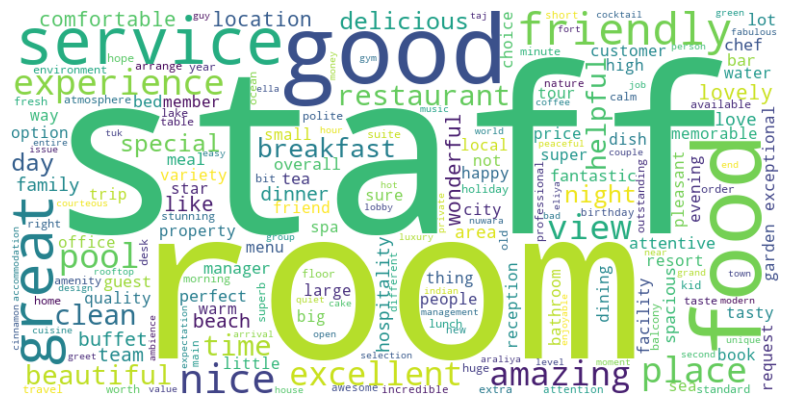

In [80]:
from wordcloud import WordCloud  
import matplotlib.pyplot as plt

# Convert the 'Names' and 'Frequency' columns into a dictionary
most_common_words = dict(zip(frequency_df['Word'], frequency_df['Frequency']))

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Find n-grams and frequencies**

An n-gram is a contiguous sequence of n items (words) from Preprocessed Review. Use Scikit-learn library to find bigrams or trigrams

In [81]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ensure 'Lemmatized_Reviews_str' column exists and is not empty
df1['Lemmatized_Reviews_str'] = df1['Lemmatized_Reviews'].fillna('')

# Convert lists in 'Lemmatized_Reviews' column back to strings
df1['Lemmatized_Reviews_str'] = df1['Lemmatized_Reviews_str'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Remove rows where 'Lemmatized_Reviews_str' is empty or contains only spaces
df1 = df1[df1['Lemmatized_Reviews_str'].str.strip() != '']

# Initialize CountVectorizer with stop words removal
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')  # Removes common English stop words

# Fit and transform the preprocessed reviews
X = vectorizer.fit_transform(df1['Lemmatized_Reviews_str'])

# Access the n-gram features
ngrams = vectorizer.get_feature_names_out()

# Get the term frequencies (working with sparse matrix)
frequencies = np.array(X.sum(axis=0)).flatten()

# Create a DataFrame to store n-grams and their frequencies
ngrams_freq_df = pd.DataFrame({'N-Gram': ngrams, 'Frequency': frequencies})

# Sort the DataFrame by frequency in descending order
ngrams_freq_df = ngrams_freq_df.sort_values(by='Frequency', ascending=False)

# Save the n-grams with frequencies to a CSV file
ngrams_freq_df.to_csv(r"D:\University\FINAL PROJECT 1\Research\ngrams_frequencies.csv", index=False)

print("N-grams with frequencies saved to CSV.")



N-grams with frequencies saved to CSV.


**Import Words**

In [1]:
import pandas as pd
data = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\ngrams_frequencies.csv")
data.head()

,N-Gram,Frequency
0,staff,24088
1,room,20730
2,stay,19559
3,good,19488
4,food,18874


**Keep N-grams with more than 10 Frequencies**

In [2]:
import pandas as pd

# Filter out rows where Frequency is less than 10
filtered_df = data[data['Frequency'] >= 10]

# Save the filtered data to CSV
output_path = r"D:\University\FINAL PROJECT 1\Research\keywords.csv"
filtered_df.to_csv(output_path, index=False)

print(f"Filtered data saved to {output_path}")

Filtered data saved to D:\University\FINAL PROJECT 1\Research\keywords.csv


# Keywords  from Literature Reviews

In [3]:
location_keywords = ['attractive environment', 'business center', 'bus','taxi','landscape','convention','business center', 'scenery',
                     'beautiful location', 'nature','relaxing atmosphere','wildlife', 'airport', 'railway',
                     'theater','train','loud', 'noise','central location', 'convenient',
                     'city center', 'shopping', 'supermarket', 'downtown','proximity to beach','mountain','beach',
                    'calm','quietness','historical site' ]
# Filter DataFrame based on keywords
freq_data = filtered_df[filtered_df['N-Gram'].isin(location_keywords)]

print(freq_data)

                   N-Gram  Frequency
39                  beach       3920
187                  calm        977
212                nature        873
315              mountain        637
351               airport        570
378                 train        535
469            convenient        423
738                 noise        272
842               scenery        237
869              wildlife        231
925                  loud        218
955    beautiful location        212
1189             shopping        168
1196            landscape        166
1516                 taxi        129
1770              railway        110
2295          city center         82
2392                  bus         79
2610     central location         72
3866          supermarket         47
6469             downtown         28
12886     historical site         14


# Keywords from Word2vec 

In [4]:
from gensim.models import Word2Vec
import pandas as pd

# Load the dataset
df1 = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Assuming 'Lemmatized_Reviews' column contains the tokenized list of words
# Tokenize the reviews if not already tokenized
tokenized_reviews = df1['Lemmatized_Reviews'].apply(lambda x: eval(x))  # Assuming it's stored as a list of words

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Predefined location-related terms, including new ones
predefined_terms = [
    "beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery",
    "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center",
    "central location", "railway", "bus", "shopping", "supermarket", "downtown",'historical site',
]

# Keyword to compare with
keyword_to_compare = "location"

# Initialize a list to store the results
similarity_results = []

# Find related words to each predefined term
for term in predefined_terms:
    try:
        # Get the top 20 most similar words to each term
        similar_words = model.wv.most_similar(term, topn=20)
        for related_word, score in similar_words:
            # Calculate similarity score with the 'location' keyword
            try:
                similarity_with_location = model.wv.similarity(related_word, keyword_to_compare)
                # Keep only related words with a similarity score greater than 0.0
                if similarity_with_location > 0.0:
                    similarity_results.append({'Term': term, 'Related Word': related_word, 
                                                'Similarity Score with Location': similarity_with_location})
            except KeyError:
                print(f"The word '{related_word}' not found in the model vocabulary")
    except KeyError:
        print(f"The term '{term}' not found in the model vocabulary")

# Create a DataFrame from the results
similarity_df = pd.DataFrame(similarity_results)

# Save the DataFrame to an Excel file
output_file_path = r"D:\University\FINAL PROJECT 1\Research\similarity_scores_filtered.xlsx"
similarity_df.to_excel(output_file_path, index=False)

# Inform the user
print(f"Filtered similarity scores saved to {output_file_path}")




The term 'beautiful location' not found in the model vocabulary
The term 'city center' not found in the model vocabulary
The term 'central location' not found in the model vocabulary
The term 'historical site' not found in the model vocabulary
Filtered similarity scores saved to D:\University\FINAL PROJECT 1\Research\similarity_scores_filtered.xlsx


In [5]:
from gensim.models import Word2Vec
import pandas as pd

# Load the dataset
df1 = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Assuming 'Lemmatized_Reviews' column contains the tokenized list of words
# Tokenize the reviews if not already tokenized
tokenized_reviews = df1['Lemmatized_Reviews'].apply(lambda x: eval(x))  # Assuming it's stored as a list of words

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Predefined location-related terms, including new ones
predefined_terms = ["beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery", 
                    "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
                    "central location", "railway", "bus", "shopping", "supermarket", "downtown",'historical site' ]

# Find related words to each predefined term
related_words = {}
for term in predefined_terms:
    try:
        # Get the top 10 most similar words to each term
        similar_words = model.wv.most_similar(term, topn=20)
        related_words[term] = similar_words
    except KeyError:
        print(f"The term '{term}' not found in the model vocabulary")

# Prepare data for Excel
related_words_list = []
for term, words in related_words.items():
    for word, score in words:
        related_words_list.append({"Term": term, "Related Word": word, "Similarity": score})

# Create a DataFrame
related_words_df = pd.DataFrame(related_words_list)

# Save to Excel
excel_file_path = r"D:\University\FINAL PROJECT 1\Research\related_words.xlsx"
related_words_df.to_excel(excel_file_path, index=False)

print(f"Related words saved to {excel_file_path}")


The term 'beautiful location' not found in the model vocabulary
The term 'city center' not found in the model vocabulary
The term 'central location' not found in the model vocabulary
The term 'historical site' not found in the model vocabulary
Related words saved to D:\University\FINAL PROJECT 1\Research\related_words.xlsx


In [8]:
import pandas as pd
import numpy as np

# Path to GloVe pre-trained embeddings
glove_file = r"D:\University\FINAL PROJECT 1\glove.6B.100d.txt" # Replace with the correct path

# Load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_dict = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

# Load GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_file)

# Predefined location-related terms
predefined_terms = ["beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery", 
                    "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
                    "central location", "railway", "bus", "shopping", "supermarket", "downtown",'historical site' ]
# Function to find the cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Find related words to each predefined term using GloVe embeddings
def find_similar_glove_words(embeddings_dict, term, top_n=10):
    if term in embeddings_dict:
        term_vector = embeddings_dict[term]
        similarities = {}
        for word, vector in embeddings_dict.items():
            similarity = cosine_similarity(term_vector, vector)
            similarities[word] = similarity
        # Sort words by similarity and get the top N most similar
        sorted_words = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
        return sorted_words[1:top_n+1]  # Exclude the term itself
    else:
        return None

# Find related words for each predefined term
related_words_glove = {}
for term in predefined_terms:
    try:
        similar_words = find_similar_glove_words(glove_embeddings, term, top_n=20)
        if similar_words:
            related_words_glove[term] = similar_words
        else:
            print(f"The term '{term}' not found in the GloVe vocabulary.")
    except Exception as e:
        print(f"Error processing term '{term}': {e}")

# Display the results
for term, words in related_words_glove.items():
    print(f"Words related to '{term}':")
    for word, similarity in words:
        print(f"  {word} (similarity: {similarity:.4f})")
    print("\n")


The term 'beautiful location' not found in the GloVe vocabulary.
The term 'city center' not found in the GloVe vocabulary.
The term 'central location' not found in the GloVe vocabulary.


KeyboardInterrupt: 

**FastText**

In [48]:
from gensim.models import FastText

# Train the FastText model (or load pre-trained)
model = FastText(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Get related words using FastText
related_words_fasttext = {}
for term in predefined_terms:
    try:
        similar_words = model.wv.most_similar(term, topn=10)
        related_words_fasttext[term] = similar_words
    except KeyError:
        print(f"The term '{term}' not found in the model vocabulary")

# Display results
for term, words in related_words_fasttext.items():
    print(f"FastText related words for '{term}':")
    for word, score in words:
        print(f"  {word} (similarity: {score})")
    print("\n")



FastText related words for 'beach':
  beachcafés (similarity: 0.9932191371917725)
  beachgo (similarity: 0.9921577572822571)
  beachbuzz (similarity: 0.9868409633636475)
  beachsurf (similarity: 0.9854493737220764)
  beachwe (similarity: 0.9838660359382629)
  beachyou (similarity: 0.9830120205879211)
  ugabeach (similarity: 0.9716917276382446)
  beachi (similarity: 0.9677635431289673)
  beachit (similarity: 0.9662514925003052)
  beachsea (similarity: 0.9633689522743225)


FastText related words for 'calm':
  peacefulcalm (similarity: 0.9621015787124634)
  calms (similarity: 0.931567370891571)
  calmpeaceful (similarity: 0.9312854409217834)
  peacefullnes (similarity: 0.9249803423881531)
  peacefullythe (similarity: 0.9237406253814697)
  peacefull (similarity: 0.921454906463623)
  peacefulthe (similarity: 0.920896589756012)
  peaceful (similarity: 0.9159601330757141)
  calma (similarity: 0.9062393307685852)
  environmentunwind (similarity: 0.897257387638092)


FastText related words for

In [49]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec, FastText


# Assuming 'Lemmatized_Reviews' column contains the tokenized list of words
tokenized_reviews = df1['Lemmatized_Reviews'].apply(lambda x: eval(x))

# Predefined location-related terms
predefined_terms = ["beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery", 
                    "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
                    "central location", "railway", "bus", "shopping", "supermarket", "downtown" ]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Train FastText model
fasttext_model = FastText(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Function to get related words from a model
def get_related_words(model, terms):
    related_words = {}
    for term in terms:
        try:
            similar_words = model.wv.most_similar(term, topn=10)  # Adjust topn as needed
            related_words[term] = [word for word, _ in similar_words]
        except KeyError:
            print(f"The term '{term}' not found in the model vocabulary")
    return related_words

# Get related words for both models
related_words_w2v = get_related_words(word2vec_model, predefined_terms)
related_words_ft = get_related_words(fasttext_model, predefined_terms)

# Define ground truth
ground_truth = {
    'nature': ['wildlife', 'outdoors', 'scenery'],
    'green': ['eco-friendly', 'environmental'],
    'mountain': ['hill', 'peak'],
    'airport': ['terminal', 'airfield'],
    'convenient': ['accessible', 'handy'],
    'noise': ['sound', 'disturbance'],
    'forest': ['woods', 'jungle'],
    'scenery': ['landscape', 'view'],
    'wildlife': ['animals', 'nature'],
    'loud': ['noisy', 'boisterous'],
    'beautiful location': ['scenic', 'picturesque'],
    'entertainment': ['amusement', 'recreation'],
    'waterfall': ['cascade', 'falls'],
    'railway': ['train', 'tracks'],
    'city center': ['downtown', 'urban'],
    'shopping': ['retail', 'stores'],
    'central location': ['convenient', 'accessible'],
    'supermarket': ['grocery', 'store'],
}


# Function to calculate accuracy for model predictions
def calculate_accuracy(related_words, ground_truth):
    total_predictions = 0
    correct_predictions = 0
    
    for term, predicted_words in related_words.items():
        total_predictions += len(predicted_words)
        correct_predictions += len(set(predicted_words).intersection(ground_truth.get(term, [])))
    
    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy

# Calculate accuracy for Word2Vec and FastText
accuracy_w2v = calculate_accuracy(related_words_w2v, ground_truth)
accuracy_ft = calculate_accuracy(related_words_ft, ground_truth)

# Now, implement the GloVe model
# Path to GloVe pre-trained embeddings
glove_file = r"D:\University\FINAL PROJECT 1\glove.6B.100d.txt"  # Replace with the correct path

# Load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_dict = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

# Load GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_file)

# Function to find the cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Find related words to each predefined term using GloVe embeddings
def find_similar_glove_words(embeddings_dict, term, top_n=10):
    if term in embeddings_dict:
        term_vector = embeddings_dict[term]
        similarities = {}
        for word, vector in embeddings_dict.items():
            similarity = cosine_similarity(term_vector, vector)
            similarities[word] = similarity
        # Sort words by similarity and get the top N most similar
        sorted_words = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
        return sorted_words[1:top_n+1]  # Exclude the term itself
    else:
        return None

# Find related words for each predefined term
related_words_glove = {}
for term in predefined_terms:
    try:
        similar_words = find_similar_glove_words(glove_embeddings, term, top_n=10)
        if similar_words:
            related_words_glove[term] = [word for word, _ in similar_words]
        else:
            print(f"The term '{term}' not found in the GloVe vocabulary.")
    except Exception as e:
        print(f"Error processing term '{term}': {e}")

# Calculate accuracy for GloVe
accuracy_glove = calculate_accuracy(related_words_glove, ground_truth)

# Print accuracies
print(f"Word2Vec Accuracy: {accuracy_w2v:.2f}%")
print(f"FastText Accuracy: {accuracy_ft:.2f}%")
print(f"GloVe Accuracy: {accuracy_glove:.2f}%")

# Compare the best model
if accuracy_w2v > accuracy_ft and accuracy_w2v > accuracy_glove:
    best_model = "Word2Vec"
    best_accuracy = accuracy_w2v
elif accuracy_ft > accuracy_w2v and accuracy_ft > accuracy_glove:
    best_model = "FastText"
    best_accuracy = accuracy_ft
else:
    best_model = "GloVe"
    best_accuracy = accuracy_glove

print(f"The best model is {best_model} with an accuracy of {best_accuracy:.2f}%.")

The term 'beautiful location' not found in the model vocabulary
The term 'city center' not found in the model vocabulary
The term 'central location' not found in the model vocabulary
The term 'historical site' not found in the model vocabulary
The term 'beautiful location' not found in the GloVe vocabulary.
The term 'city center' not found in the GloVe vocabulary.
The term 'central location' not found in the GloVe vocabulary.
The term 'historical site' not found in the GloVe vocabulary.
Word2Vec Accuracy: 2.22%
FastText Accuracy: 0.45%
GloVe Accuracy: 5.56%
The best model is GloVe with an accuracy of 5.56%.


**New keywords**


In [ ]:
#"fort", "city", "town", "lake", "scenic", "quiet", "hill", "mall", "countryside", "peaceful",
#"river", "rock", "forest", "jungle", "seclude", "sunset", "relax", "sea", "attractive",
#"highway", "natural", "wild", "paddy", "waterfall", "village", "market", "rainforest", "traffic",
#"noisy", "beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery",
#"beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
#"central location", "railway", "bus", "shopping", "supermarket", "downtown", 

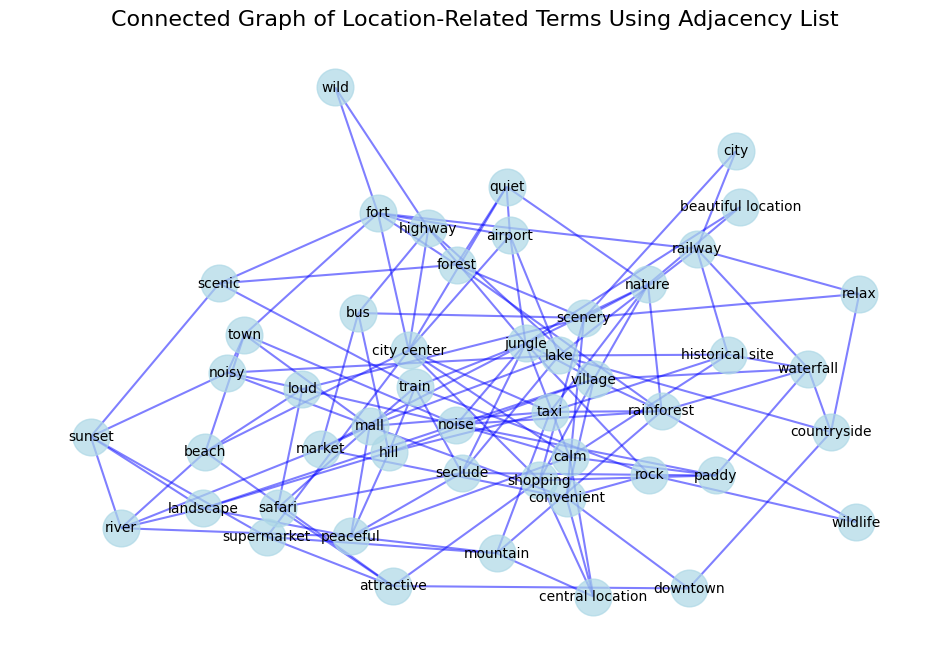

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the list of location-related terms
terms = [
    "fort", "city", "town", "lake", "scenic", "quiet", "hill", "mall", "countryside", "peaceful",
    "river", "rock", "forest", "jungle", "seclude", "sunset", "relax", "attractive",
    "highway", "wild", "paddy", "waterfall", "village", "market", "rainforest",
    "noisy", "beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery", 
    "safari", "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
    "central location", "railway", "bus", "shopping", "supermarket", "downtown", "historical site"
]

# Create a graph object
G = nx.Graph()

# Create a random adjacency list (representing edges) using arrays
num_terms = len(terms)
adjacency_list = {term: [] for term in terms}  # Initialize adjacency list

# Populate the adjacency list with random connections
for i in range(num_terms):
    # Randomly connect each term to 2 to 4 other terms
    num_connections = np.random.randint(2, 5)
    connections = np.random.choice(terms, num_connections, replace=False)  # Select unique terms
    
    for conn in connections:
        if conn != terms[i]:  # Avoid self-loop
            adjacency_list[terms[i]].append(conn)

# Add edges to the graph based on the adjacency list
for term, connections in adjacency_list.items():
    for conn in connections:
        G.add_edge(term, conn)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Add title
plt.title("Connected Graph of Location-Related Terms Using Adjacency List", fontsize=16)

# Show the plot
plt.axis('off')  # Turn off the axis
plt.show()


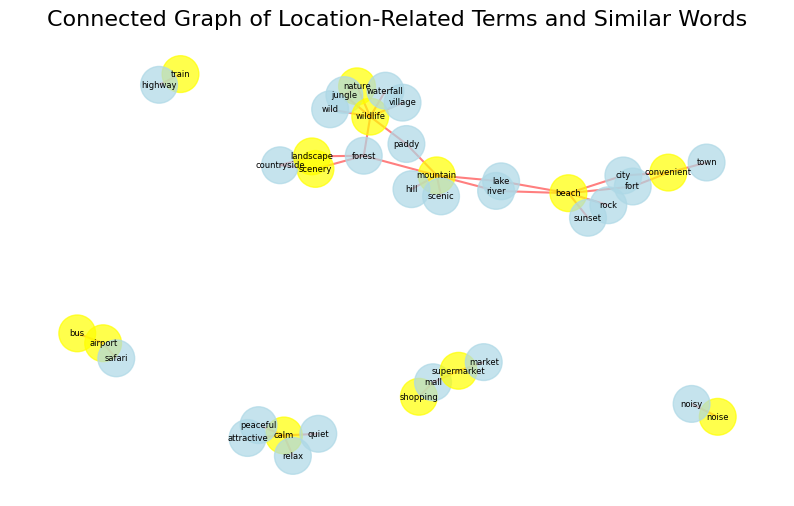

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Original location-related terms
original_terms = [
    "beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery", 
    "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
    "central location", "railway", "bus", "shopping", "supermarket", "downtown", "historical site"
]

# Similar words and their similarity scores
similarity_scores = {
    "beach": [("rock", 0.705), ("lake", 0.685), ("river", 0.659), ("fort", 0.658), 
              ("city", 0.646), ("sunset", 0.640)],
    "calm": [("peaceful", 0.905), ("quiet", 0.825), ("relax", 0.799), ("attractive", 0.739)],
    "nature": [("jungle", 0.797), ("wildlife", 0.771)],
    "mountain": [("river", 0.926), ("lake", 0.925), ("hill", 0.912), 
                 ("scenic", 0.858), ("forest", 0.833), ("paddy", 0.813)],
    "convenient": [("fort", 0.796), ("city", 0.776), ("town", 0.771)],
    "airport": [("safari", 0.795), ("bus", 0.776)],
    "train": [("highway", 0.687)],
    "scenery": [("countryside", 0.821), ("forest", 0.799)],
    "noise": [("noisy", 0.923)],
    "wildlife": [("wild", 0.935), ("village", 0.928), ("waterfall", 0.888), 
                 ("paddy", 0.887), ("jungle", 0.887), ("forest", 0.886)],
    "landscape": [("countryside", 0.928), ("forest", 0.878)],
    "shopping": [("mall", 0.962)],
    "supermarket": [("market", 0.947), ("mall", 0.906)],
}

# Create a graph object
G = nx.Graph()

# Add edges between original terms and their similar words based on similarity scores
for term, similar_list in similarity_scores.items():
    for similar, score in similar_list:
        G.add_edge(term, similar, weight=score)

# Define node colors: highlight original terms in a different color
node_colors = ['yellow' if term in original_terms else 'lightblue' for term in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='red')
nx.draw_networkx_labels(G, pos, font_size=6, font_family='sans-serif')

# Add title
plt.title("Connected Graph of Location-Related Terms and Similar Words", fontsize=16)

# Show the plot
plt.axis('off')  # Turn off the axis
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_29112\11487529.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # You can change this to any other colormap


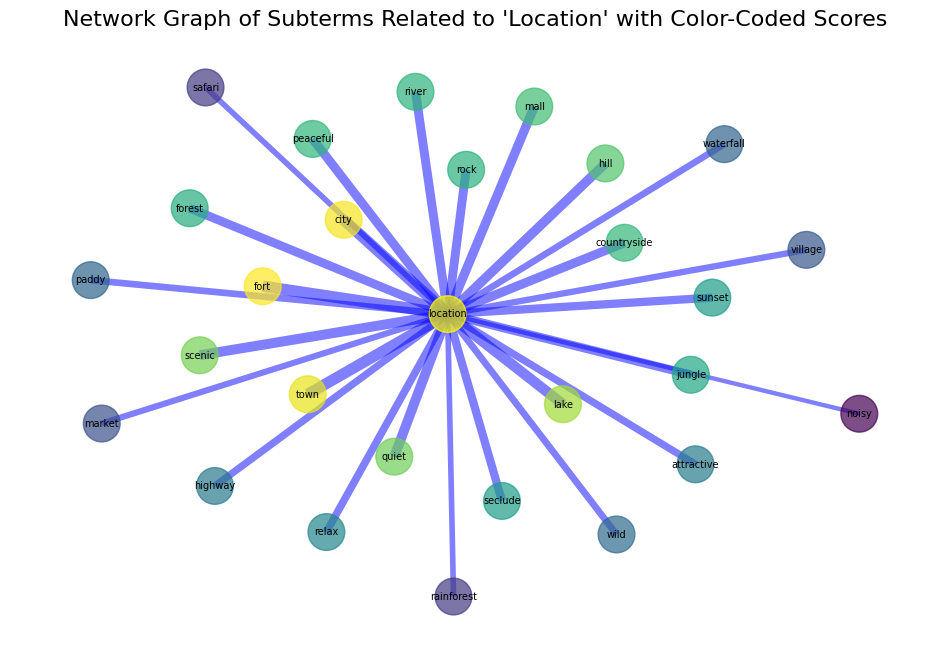

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Data for similarity scores related to the keyword "location"
subterms = [
    "fort", "city", "town", "lake", "scenic", "quiet", "hill", 
    "mall", "countryside", "peaceful", "river", "rock", 
    "forest", "jungle", "seclude", "sunset", "relax", 
    "attractive", "highway", "wild", "paddy", "waterfall", 
    "village", "market", "safari", "rainforest", "noisy"
]

similarity_scores = [
    0.82323, 0.815325, 0.804287, 0.752234, 0.71696, 
    0.7119, 0.68296, 0.667255, 0.653911, 0.647892, 
    0.64482, 0.6404, 0.629661, 0.619144, 0.596077, 
    0.595069, 0.549292, 0.52592, 0.522495, 0.491254, 
    0.482498, 0.477793, 0.455445, 0.442823, 0.404886, 
    0.404387, 0.316864
]

# Create a graph object
G = nx.Graph()

# Add edges between "location" and each subterm with the similarity score as weight
keyword = "location"
for term, score in zip(subterms, similarity_scores):
    G.add_edge(keyword, term, weight=score)

# Define edge widths based on similarity scores (scaled for better visibility)
edge_widths = [G[u][v]['weight'] * 10 for u, v in G.edges()]  # Scale by 10 for visibility

# Normalize similarity scores to use for coloring
min_score = min(similarity_scores)
max_score = max(similarity_scores)
norm_scores = [(score - min_score) / (max_score - min_score) for score in similarity_scores]

# Map normalized scores to colors using a colormap
cmap = cm.get_cmap('viridis')  # You can change this to any other colormap
node_colors = [cmap(norm) for norm in norm_scores]  # Assign colors based on scores

# Add color for the keyword node
node_colors.insert(0, 'yellow')  # Highlight the 'location' keyword

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(G, pos, 
                         width=edge_widths, 
                         alpha=0.5, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=7, font_family='sans-serif')

# Add title
plt.title("Network Graph of Subterms Related to 'Location' with Color-Coded Scores", fontsize=16)

# Show the plot
plt.axis('off')  # Turn off the axis
plt.show()


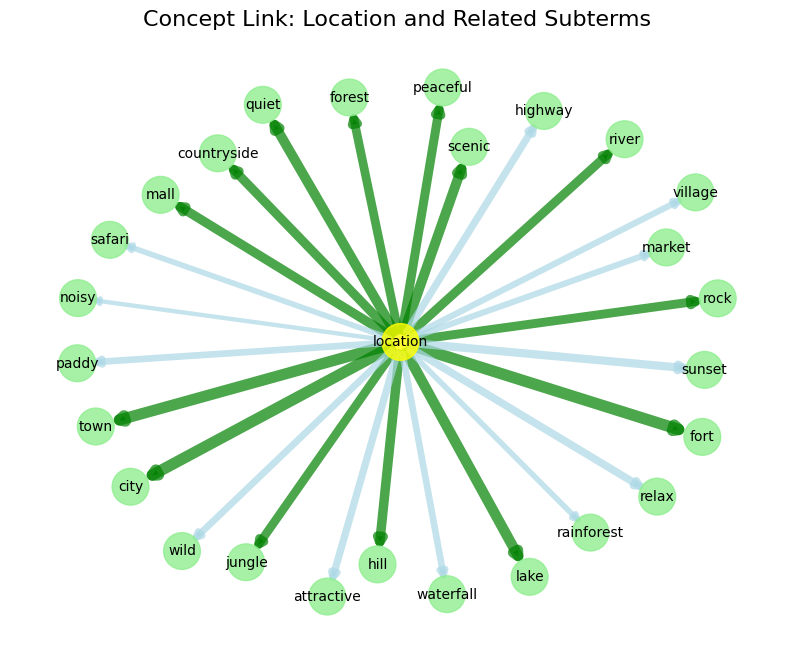

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Data for similarity scores related to the keyword "location"
subterms = [
    "fort", "city", "town", "lake", "scenic", "quiet", "hill", 
    "mall", "countryside", "peaceful", "river", "rock", 
    "forest", "jungle", "sunset", "relax", 
    "attractive", "highway", "wild", "paddy", "waterfall", 
    "village", "market", "safari", "rainforest", "noisy"
]

similarity_scores = [
    0.82323, 0.815325, 0.804287, 0.752234, 0.71696, 
    0.7119, 0.68296, 0.667255, 0.653911, 0.647892, 
    0.64482, 0.6404, 0.629661, 0.619144, 
    0.595069, 0.549292, 0.52592, 0.522495, 0.491254, 
    0.482498, 0.477793, 0.455445, 0.442823, 0.404886, 
    0.404387, 0.316864
]

# Create a directed graph object for concept links
G = nx.DiGraph()

# Add edges between "location" and each subterm with the similarity score as weight
keyword = "location"
for term, score in zip(subterms, similarity_scores):
    G.add_edge(keyword, term, weight=score)

# Define edge widths based on similarity scores (scaled for better visibility)
edge_widths = [G[u][v]['weight'] * 10 for u, v in G.edges()]  # Scale by 10 for visibility

# Define node colors (yellow for the central concept, light green for related subterms)
node_colors = ['yellow' if node == keyword else 'lightgreen' for node in G.nodes()]

# Define edge colors based on the strength of similarity (more intense color for higher similarity)
edge_colors = ['green' if G[u][v]['weight'] > 0.6 else 'lightblue' for u, v in G.edges()]

# Draw the graph as a concept link
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.7, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Add title
plt.title("Concept Link: Location and Related Subterms", fontsize=16)

# Show the plot
plt.axis('off')  # Turn off the axis
plt.show()



## Frequency for each hotel

In [10]:
import pandas as pd
import re

# Load the preprocessed reviews CSV file
df1 = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# List of words to search for
words = ["fort", "city", "town", "lake", "scenic", "quiet", "hill", "mall", "countryside", "peaceful",
"river", "rock", "forest", "jungle", "sunset", "relax", "attractive","safari",
"highway", "wild", "paddy", "waterfall", "village", "market", "rainforest",
"noisy", "beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery",
"beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
"central location", "railway", "bus", "shopping", "supermarket", "downtown","historical site"]

# Initialize a dictionary to store the counts for each word
word_counts = {word: [] for word in words}
hotel_names = []  # List to store hotel names

# Group the DataFrame by 'Hotel names'
grouped_df = df1.groupby('Hotel names')

# Iterate through each hotel group
for hotel, group in grouped_df:
    # Concatenate all reviews for the current hotel into a single string
    all_reviews = ' '.join(group['Lemmatized_Reviews'].astype(str).apply(lambda x: ' '.join(eval(x))))
    
    # Initialize a dictionary to count occurrences for the current hotel
    current_counts = {word: 0 for word in words}
    
    # Count the occurrences of each word in the concatenated reviews
    for word in words:
        count = len(re.findall(r'\b{}\b'.format(re.escape(word)), all_reviews))
        current_counts[word] = count  # Store the count in the current_counts dictionary

    # Append the counts for the current hotel to word_counts
    for word in words:
        word_counts[word].append(current_counts[word])
    
    # Append the hotel name to the hotel_names list
    hotel_names.append(hotel)

# Convert the word_counts dictionary into a DataFrame
counts_df = pd.DataFrame(word_counts)

# Add the hotel names to the counts DataFrame
counts_df['Hotel names'] = hotel_names

# Move the 'Hotel names' column to the front
counts_df = counts_df[['Hotel names'] + [col for col in counts_df.columns if col != 'Hotel names']]

# Print the first few rows of the resulting DataFrame
print(counts_df.head())

# Save the resulting DataFrame to a CSV file
counts_df.to_csv(r"D:\University\FINAL PROJECT 1\Research\hotel_word_frequencies.csv", index=False)



                                Hotel names  fort  city  town  lake  scenic  \
0                     98 Acres Resort & Spa     0     1    14     0       3   
1  Aarunya Nature Resort - Kandy, Sri Lanka     0     6     1     0       0   
2                             Aditya Resort     0     1     1     0       0   
3              Amaara Forest Hotel Sigiriya     0     3     0     1       1   
4                                 Amangalla    12     2     4     0       0   

   quiet  hill  mall  countryside  ...  landscape  taxi  city center  \
0      7    14     0            3  ...          6     1            0   
1      1     5     0            0  ...          3     0            0   
2      7     0     0            0  ...          1     0            0   
3      3     0     0            0  ...          0     1            0   
4      0     0     0            0  ...          1     2            0   

   central location  railway  bus  shopping  supermarket  downtown  \
0                 0   

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset with hotel reviews
df1 = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Group the reviews by 'Hotel names', concatenating all reviews for each hotel into a single string
grouped_df = df1.groupby('Hotel names')['Lemmatized_Reviews'].apply(lambda x: ' '.join(x))

# Reset the index to get a clean DataFrame
grouped_df = grouped_df.reset_index()

# Predefined list of location-related terms, including multi-word phrases
location_terms = [
    "fort", "city", "town", "lake", "scenic", "quiet", "hill", "mall", "countryside",
    "peaceful", "river", "rock", "forest", "jungle", "sunset", "relax", "attractive",
    "safari", "highway", "wild", "paddy", "waterfall", "village", "market", "rainforest",
    "noisy", "beach", "calm", "nature", "mountain", "convenient", "airport", "train", 
    "scenery", "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", 
    "city center", "central location", "railway", "bus", "shopping", "supermarket", 
    "downtown", "historical site"
]

# Initialize TfidfVectorizer with the specified vocabulary and n-gram range to capture multi-word terms
vectorizer = TfidfVectorizer(vocabulary=location_terms, ngram_range=(1, 2))

# Apply TF-IDF on the concatenated reviews for each hotel
tfidf_matrix = vectorizer.fit_transform(grouped_df['Lemmatized_Reviews'])

# Convert the TF-IDF matrix into a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add hotel names to the DataFrame
tfidf_df['Hotel names'] = grouped_df['Hotel names']

# Move 'Hotel names' to the front of the DataFrame
tfidf_df = tfidf_df[['Hotel names'] + [col for col in tfidf_df.columns if col != 'Hotel names']]

# Save the resulting TF-IDF scores to a CSV file for analysis
output_path = r"D:\University\FINAL PROJECT 1\Research\tfidf_location_terms.csv"
tfidf_df.to_csv(output_path, index=False)

# Print the confirmation message
print(f"TF-IDF scores for location-related terms saved to {output_path}")



TF-IDF scores for location-related terms saved to D:\University\FINAL PROJECT 1\Research\tfidf_location_terms.csv


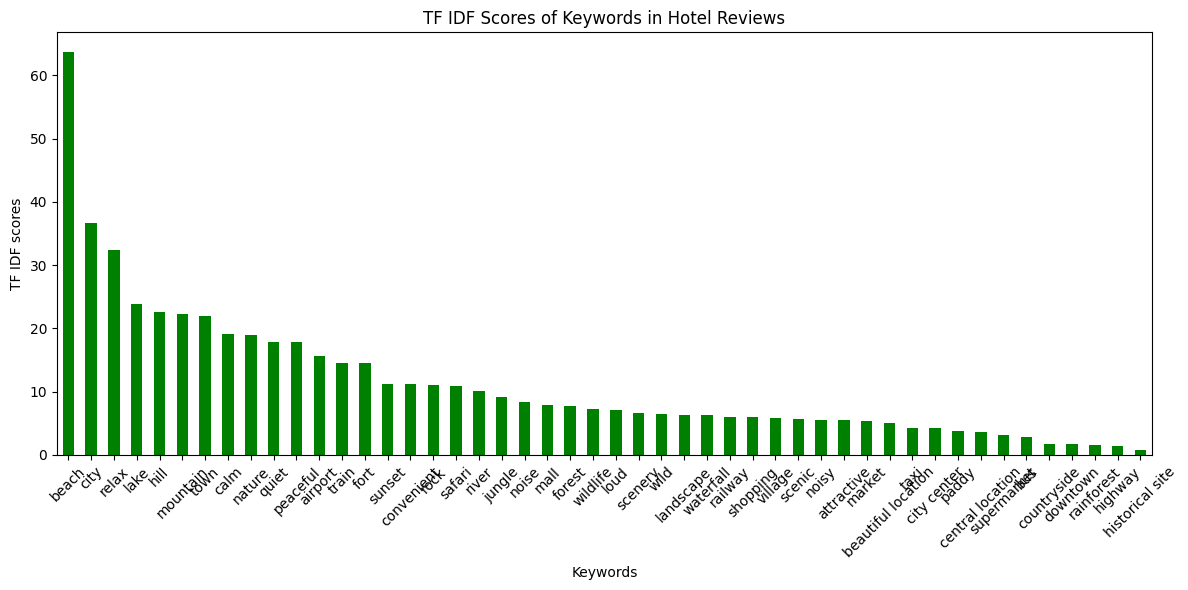

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the 'Hotel names' column as the index for better visualization (optional)
tfidf_df.set_index('Hotel names', inplace=True)

# Sum the frequencies for each keyword across all hotels
frequency_sums = tfidf_df.sum().sort_values(ascending=False)

# Plotting the frequencies
plt.figure(figsize=(12, 6))  # Set the figure size
frequency_sums.plot(kind='bar', color='green')  # Create a bar plot
plt.title('TF IDF Scores of Keywords in Hotel Reviews')
plt.xlabel('Keywords')
plt.ylabel('TF IDF scores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


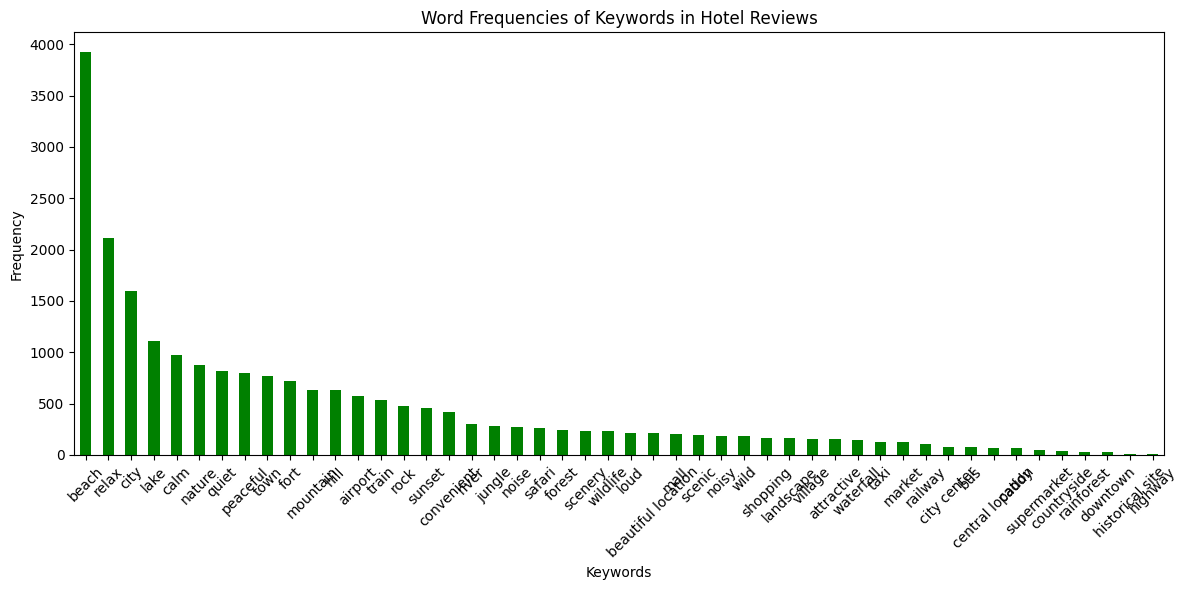

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the 'Hotel names' column as the index for better visualization (optional)
counts_df.set_index('Hotel names', inplace=True)

# Sum the frequencies for each keyword across all hotels
frequency_sums = counts_df.sum().sort_values(ascending=False)

# Plotting the frequencies
plt.figure(figsize=(12, 6))  # Set the figure size
frequency_sums.plot(kind='bar', color='green')  # Create a bar plot
plt.title('Word Frequencies of Keywords in Hotel Reviews')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


In [11]:
# Set the 'Hotel names' column as the index for better visualization (optional)
counts_df.set_index('Hotel names', inplace=True)

# Sum the frequencies for each keyword across all hotels
frequency_sums = counts_df.sum().sort_values(ascending=False)
# Convert to DataFrame and rename columns
frequency_sums_df = frequency_sums.reset_index()
frequency_sums_df.columns = ['Keyword', 'Frequency'] 

# Check if frequency_sums has data
print(frequency_sums_df)
  # Set column names

               Keyword  Frequency
0                beach       3920
1                relax       2116
2                 city       1596
3                 lake       1110
4                 calm        977
5               nature        873
6                quiet        817
7             peaceful        803
8                 town        766
9                 fort        721
10            mountain        637
11                hill        635
12             airport        570
13               train        535
14                rock        479
15              sunset        461
16          convenient        423
17               river        306
18              jungle        280
19               noise        272
20              safari        267
21              forest        239
22             scenery        237
23            wildlife        231
24                loud        218
25  beautiful location        212
26                mall        205
27              scenic        193
28            

In [ ]:
kmean clustering

In [33]:
import gensim
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
import numpy as np

# Sample keywords including unigrams and bigrams
keywords = [
    "fort", "city", "town", "lake", "scenic", "quiet", "hill",
    "mall", "countryside", "peaceful", "river", "rock", "jungle",
    "sunset", "relax", "attractive", "safari", "highway", "wild",
    "paddy", "waterfall", "village", "market", "rainforest", 
    "noisy", "beach", "calm", "nature", "mountain", "convenient", 
    "airport", "train", "scenery", "noise", "loud", "wildlife", 
    "landscape", "taxi", "city center", "central location", 
    "railway", "bus", "shopping", "supermarket", "downtown", 
    "historical site", "beautiful location"
]

# Load pre-trained Word2Vec model (you can use your own model or download one)
# Example: Google News Word2Vec model (This model is large and may take time to download)
# model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# For the sake of example, let's assume we have a smaller, pre-trained model
# In practice, replace this with your actual model
# Here we will create dummy embeddings for demonstration
word_vectors = {word: np.random.rand(300) for word in keywords}  # Dummy embeddings

# Function to get the average vector for a given keyword
def get_keyword_vector(keyword):
    return word_vectors.get(keyword)

# Create vectors for all keywords
vectors = np.array([get_keyword_vector(word) for word in keywords if get_keyword_vector(word) is not None])

# Perform KMeans clustering
num_clusters = 6  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=56)
kmeans.fit(vectors)

# Assign each keyword to a cluster
clusters = {i: [] for i in range(num_clusters)}
for idx, label in enumerate(kmeans.labels_):
    clusters[label].append(keywords[idx])

# Display the clusters
for cluster_id, cluster_keywords in clusters.items():
    print(f"Cluster {cluster_id}: {cluster_keywords}")


Cluster 0: ['town', 'safari', 'central location', 'beautiful location']
Cluster 1: ['fort', 'countryside', 'peaceful', 'river', 'sunset', 'attractive', 'waterfall', 'market', 'nature', 'convenient', 'airport', 'train', 'scenery', 'downtown']
Cluster 2: ['hill', 'highway', 'wild', 'village', 'rainforest', 'noisy', 'taxi', 'city center', 'bus']
Cluster 3: ['lake', 'scenic', 'mall', 'paddy', 'calm', 'wildlife', 'railway', 'supermarket']
Cluster 4: ['rock', 'relax', 'beach']
Cluster 5: ['city', 'quiet', 'jungle', 'mountain', 'noise', 'loud', 'landscape', 'shopping', 'historical site']


### Topic modelling 

In [4]:
import random
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# List of words provided
words =["fort", "city", "town", "lake", "scenic", "quiet", "hill", "mall", "countryside", "peaceful",
"river", "rock", "forest", "jungle", "sunset", "relax", "attractive","safari",
"highway", "wild", "paddy", "waterfall", "village", "market", "rainforest",
"noisy", "beach", "calm", "nature", "mountain", "convenient", "airport", "train", "scenery",
"beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", "city center", 
"central location", "railway", "bus", "shopping", "supermarket", "downtown","historical site"]

# Step 1: Create pseudo-documents (manually or randomly group words together)
# For simplicity, let's create a few pseudo-documents by randomly assigning words into documents
num_documents = 5
pseudo_documents = [[] for _ in range(num_documents)]
for word in words:
    pseudo_documents[random.randint(0, num_documents - 1)].append(word)

# Step 2: Create a Gensim Dictionary and Corpus
dictionary = corpora.Dictionary(pseudo_documents)
corpus = [dictionary.doc2bow(doc) for doc in pseudo_documents]

# Step 3: Train LDA model
num_topics = 6
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Step 4: Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

# Step 5: Get the word distribution per topic
for idx, topic in lda_model.show_topics(formatted=False, num_words=20):
    print(f"Topic {idx}:")
    for word, weight in topic:
        print(f"  {word}: {weight:.4f}")



Topic 0: 0.083*"downtown" + 0.083*"paddy" + 0.083*"market" + 0.083*"village" + 0.083*"scenic"
Topic 1: 0.083*"loud" + 0.083*"shopping" + 0.083*"historical site" + 0.083*"city center" + 0.083*"noise"
Topic 2: 0.051*"railway" + 0.051*"train" + 0.051*"hill" + 0.051*"quiet" + 0.051*"rainforest"
Topic 3: 0.021*"attractive" + 0.021*"taxi" + 0.021*"market" + 0.021*"noise" + 0.021*"jungle"
Topic 4: 0.069*"bus" + 0.069*"mall" + 0.069*"relax" + 0.069*"central location" + 0.069*"scenery"
Topic 5: 0.058*"safari" + 0.058*"peaceful" + 0.058*"rock" + 0.058*"nature" + 0.058*"wildlife"
Topic 0:
  downtown: 0.0833
  paddy: 0.0833
  market: 0.0833
  village: 0.0833
  scenic: 0.0833
  taxi: 0.0833
  attractive: 0.0119
  historical site: 0.0119
  shopping: 0.0119
  jungle: 0.0119
  highway: 0.0119
  city center: 0.0119
  noise: 0.0119
  landscape: 0.0119
  relax: 0.0119
  mountain: 0.0119
  scenery: 0.0119
  central location: 0.0119
  waterfall: 0.0119
  loud: 0.0119
Topic 1:
  loud: 0.0833
  shopping: 0.0

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset with hotel reviews
df1 = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Group the reviews by 'Hotel names', concatenating all reviews for each hotel into a single string
grouped_df = df1.groupby('Hotel names')['Lemmatized_Reviews'].apply(lambda x: ' '.join(x))
grouped_df = grouped_df.reset_index()

# Predefined list of location-related terms, including multi-word phrases
location_terms = [
    "fort", "city", "town", "lake", "scenic", "quiet", "hill", "mall", "countryside",
    "peaceful", "river", "rock", "forest", "jungle", "sunset", "relax", "attractive",
    "safari", "highway", "wild", "paddy", "waterfall", "village", "market", "rainforest",
    "noisy", "beach", "calm", "nature", "mountain", "convenient", "airport", "train", 
    "scenery", "beautiful location", "noise", "loud", "wildlife", "landscape", "taxi", 
    "city center", "central location", "railway", "bus", "shopping", "supermarket", 
    "downtown", "historical site"
]

# Initialize TfidfVectorizer with the specified vocabulary and n-gram range to capture multi-word terms
vectorizer = TfidfVectorizer(vocabulary=location_terms, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(grouped_df['Lemmatized_Reviews'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['Hotel names'] = grouped_df['Hotel names']
tfidf_df = tfidf_df[['Hotel names'] + [col for col in tfidf_df.columns if col != 'Hotel names']]

# Define the percentile threshold (e.g., top 90% of TF-IDF scores)
percentile_threshold = 90

# Calculate the threshold value for each term
thresholds = tfidf_df.iloc[:, 1:].apply(lambda col: np.percentile(col, percentile_threshold), axis=0)

# Filter terms with TF-IDF scores above the percentile threshold for each hotel
filtered_tfidf_df = tfidf_df.copy()
for term in thresholds.index:
    filtered_tfidf_df[term] = filtered_tfidf_df[term].apply(lambda x: x if x >= thresholds[term] else 0)

# Save the resulting filtered TF-IDF scores to a CSV file for analysis
output_path = r"D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv"
filtered_tfidf_df.to_csv(output_path, index=False)

# Inform the user
print(f"Filtered TF-IDF scores for location-related terms saved to {output_path}")


Filtered TF-IDF scores for location-related terms saved to D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv


# Visualizations 

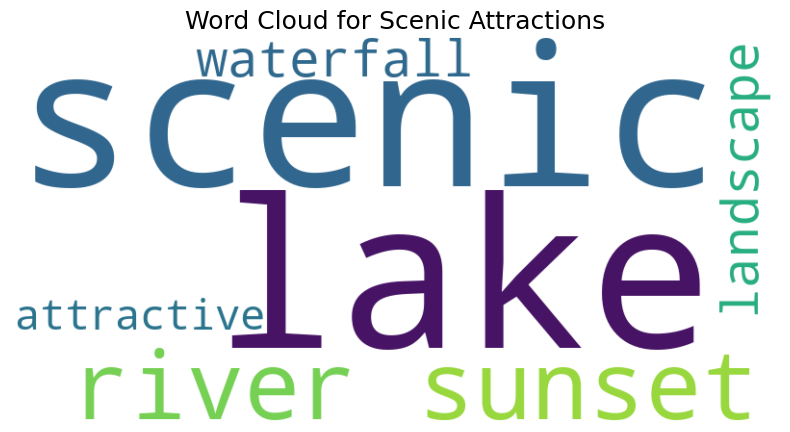

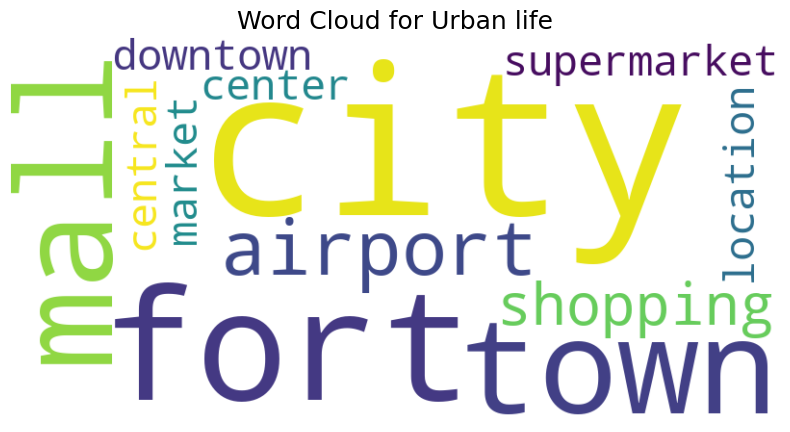

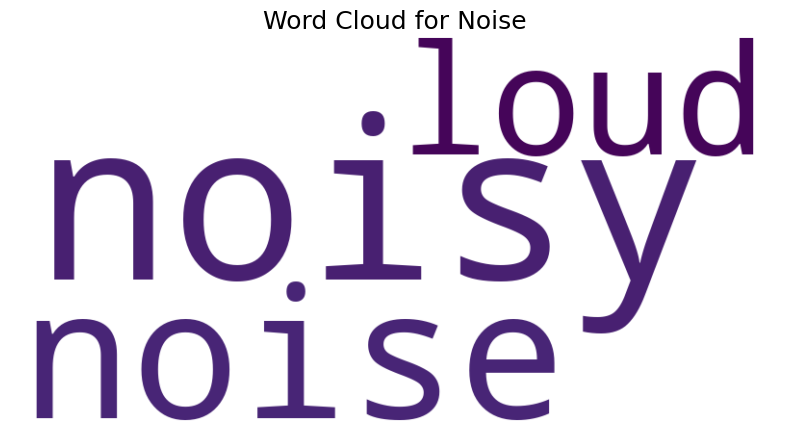

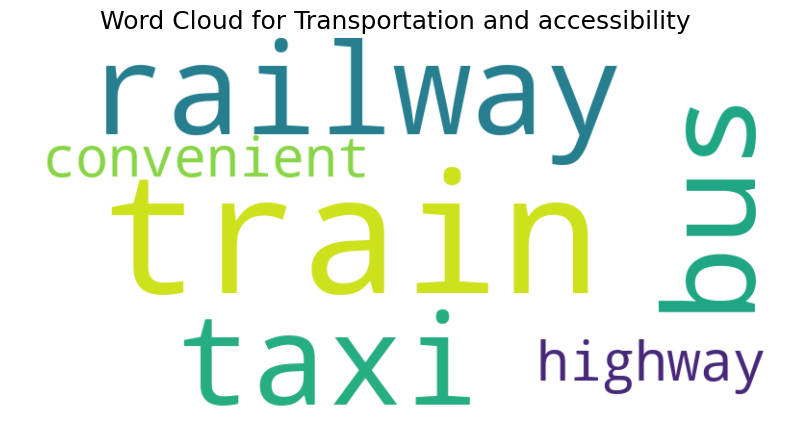

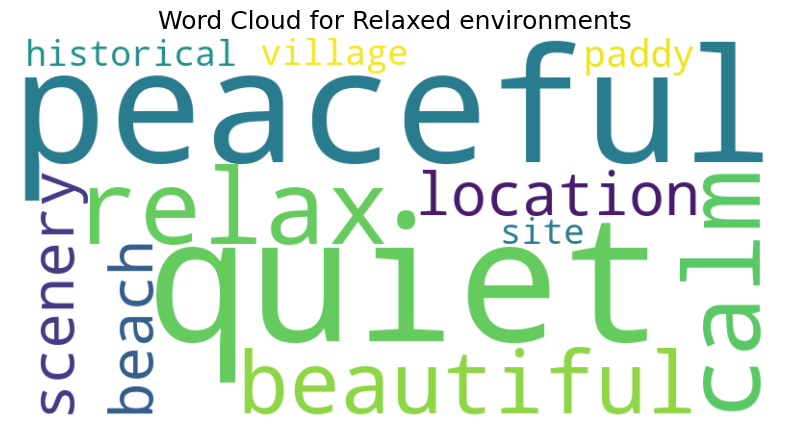

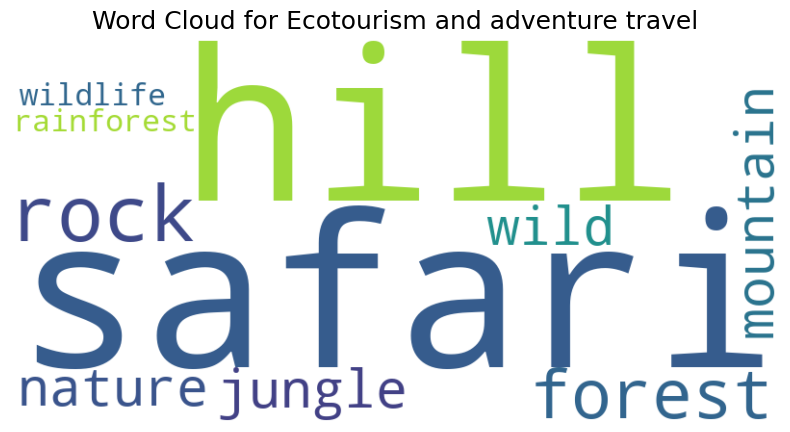

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Updated categories with associated terms
categories = {
    'Scenic Attractions': ['lake', 'scenic', 'river', 'sunset', 'waterfall', 'landscape', 'attractive'],
    'Urban life': ['fort', 'city', 'town', 'mall', 'airport', 'shopping', 'supermarket', 'market', 'downtown', 'central location', 'city center'],
    'Noise': ['noisy', 'noise', 'loud'],
    'Transportation and accessibility': ['train', 'railway', 'bus', 'taxi', 'convenient', 'highway'],
    'Relaxed environments': ['quiet', 'peaceful', 'relax', 'calm', 'beautiful location', 'scenery', 'beach', 'paddy', 'village', 'historical site'],
    'Ecotourism and adventure travel': ['safari', 'hill', 'rock', 'forest', 'jungle', 'wild', 'nature', 'mountain', 'rainforest', 'wildlife']
}

# Function to generate and plot word clouds for each category
def plot_wordcloud(terms, category_name):
    # Join the terms into a single string
    text = ' '.join(terms)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))  # Adjusted figure size for better visibility
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axis for word cloud
    plt.title(f'Word Cloud for {category_name}', fontsize=18)
    plt.show()

# Generate word clouds for each category
for category, terms in categories.items():
    plot_wordcloud(terms, category)



## GIS Visualizations 

In [30]:
import pandas as pd

# Load the dataset
file_path = r'D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv'
df = pd.read_csv(file_path)

# Initialize an empty dictionary to store results
hotel_keywords = {}

# Iterate over each row (each hotel)
for index, row in df.iterrows():
    # Get the hotel name
    hotel_name = row['Hotel names']
    
    # Filter the row to exclude the hotel name and find non-zero columns
    non_zero_columns = row.drop(['Hotel names'])[row.drop(['Hotel names']) > 0].index.tolist()
    
    # Store the results in the dictionary
    hotel_keywords[hotel_name] = non_zero_columns

# Print the results
for hotel, keywords in hotel_keywords.items():
    print(f"Hotel: {hotel}")
    print(f"Keywords: {', '.join(keywords) if keywords else 'None'}\n")


Hotel: 98 Acres Resort & Spa
Keywords: countryside, rock, noisy, mountain, scenery, noise, loud, landscape, railway, bus

Hotel: Aarunya Nature Resort - Kandy, Sri Lanka
Keywords: jungle, village, nature, mountain, landscape

Hotel: Aditya Resort
Keywords: None

Hotel: Amaara Forest Hotel Sigiriya
Keywords: river, rock, forest, safari

Hotel: Amangalla
Keywords: fort, sunset, market, noisy, noise, taxi, historical site

Hotel: Amanwella
Keywords: safari, beach

Hotel: Amba Kola
Keywords: safari, wild, wildlife

Hotel: Amethyst Resort Passikudah
Keywords: river

Hotel: Andriyala
Keywords: hill, peaceful, forest, calm, beautiful location, landscape, railway

Hotel: Araliya Beach Resort & Spa
Keywords: beach

Hotel: Araliya Green City
Keywords: city, market, shopping, supermarket

Hotel: Araliya Green Hills Hotel
Keywords: hill, downtown

Hotel: Araliya Red
Keywords: scenic, attractive, waterfall, market, noisy, mountain, noise, loud, central location

Hotel: Ayurvie Weligama
Keywords: qu

In [31]:
import pandas as pd

# Load the TF-IDF dataset
tfidf_file_path = r'D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv'
df_tfidf = pd.read_csv(tfidf_file_path)

# Load the other dataset with hotel details
df_reviews = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Initialize an empty list to store results
combined_data = []

# Iterate over each row (each hotel) in the TF-IDF dataset
for index, row in df_tfidf.iterrows():
    # Get the hotel name
    hotel_name = row['Hotel names']
    
    # Filter the row to exclude the hotel name and find non-zero columns
    non_zero_columns = row.drop(['Hotel names'])[row.drop(['Hotel names']) > 0].index.tolist()
    
    # Get the relevant information from the reviews dataframe
    hotel_info = df_reviews[df_reviews['Hotel names'] == hotel_name]
    
    # If the hotel info is found, extract the required columns
    if not hotel_info.empty:
        trip_type = hotel_info['Trip Type'].values[0]
        rating = hotel_info['Rating'].values[0]
        longitude = hotel_info['Longitude'].values[0]
        latitude = hotel_info['Latitude'].values[0]
        
        # Combine the hotel name, keywords, and additional info
        combined_data.append({
            'Hotel names': hotel_name,
            'Keywords': ', '.join(non_zero_columns) if non_zero_columns else 'None',
            'Trip Type': trip_type,
            'Rating': rating,
            'Longitude': longitude,
            'Latitude': latitude
        })

# Create a DataFrame from the combined data
combined_df = pd.DataFrame(combined_data)

# Save the combined results to a new CSV file
combined_file_path = r'D:\University\FINAL PROJECT 1\Research\combined_hotel_data.csv'
combined_df.to_csv(combined_file_path, index=False)

# Print the resulting DataFrame for confirmation
print(combined_df)

                                  Hotel names  \
0                       98 Acres Resort & Spa   
1    Aarunya Nature Resort - Kandy, Sri Lanka   
2                               Aditya Resort   
3                Amaara Forest Hotel Sigiriya   
4                                   Amangalla   
..                                        ...   
221                                 Waterland   
222                      Wattura Resort & Spa   
223                         Wild Culture Yala   
224                           Yara Galle Fort   
225              Zion View Ella Green Retreat   

                                              Keywords Trip Type  Rating  \
0    countryside, rock, noisy, mountain, scenery, n...   COUPLES     5.0   
1         jungle, village, nature, mountain, landscape   COUPLES     5.0   
2                                                 None   FRIENDS     5.0   
3                          river, rock, forest, safari      SOLO     4.0   
4    fort, sunset, market, nois

Vizualize hotel for each category

In [32]:
import pandas as pd

# Load the frequency dataset and the original dataset
counts_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\tfidf_location_terms.csv")
reviews_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Define categories and their keywords (including bigrams)
categories = {
    'Scenic Attractions': ['lake', 'scenic', 'river', 'sunset', 'waterfall', 'landscape', 'attractive'],
    'Urban life': ['fort', 'city', 'town', 'mall', 'airport', 'shopping', 'supermarket', 'market', 'downtown', 'central location', 'city center'],
    'Noise': ['noisy', 'noise', 'loud'],
    'Transportation and accessibility': ['train', 'railway', 'bus', 'taxi', 'convenient', 'highway'],
    'Relaxed environments': ['quiet', 'peaceful', 'relax', 'calm', 'beautiful location', 'scenery', 'beach', 'paddy', 'village', 'historical site'],
    'Ecotourism and adventure travel': ['safari', 'hill', 'rock', 'forest', 'jungle', 'wild', 'nature', 'mountain', 'rainforest', 'wildlife']
}

# Preprocess category keywords (no changes needed for bigrams)
def preprocess_keywords(keywords):
    return keywords  # Return keywords as they are

# Function to generate data for each category
def get_category_data(category_keywords, category_name):
    category_data = []
    
    # Preprocess the keywords for matching
    category_keywords = preprocess_keywords(category_keywords)
    
    # Iterate through each row in the counts_df and match with the relevant terms
    for index, row in counts_df.iterrows():
        matched_terms = [term for term in category_keywords if term in counts_df.columns and row[term] > 0]
        
        if matched_terms:
            hotel_name = row['Hotel names']
            # Try to get the matching review, handle case if hotel is not found
            matching_reviews = reviews_df[reviews_df['Hotel names'] == hotel_name]
            if not matching_reviews.empty:
                matching_review = matching_reviews.iloc[0]
                location = matching_review['Location']
                travel_type = matching_review['Trip Type']
                rating = matching_review['Rating']
                latitude = matching_review['Latitude']
                longitude = matching_review['Longitude']
                
                # Append matched data to the list
                category_data.append({
                    'Hotel Name': hotel_name,
                    'Location': location,
                    'Trip Type': travel_type,
                    'Matched Terms': ', '.join(matched_terms),
                    'Rating': rating,
                    'Latitude': latitude,
                    'Longitude': longitude
                })
    
    # Convert the list to a DataFrame
    category_df = pd.DataFrame(category_data)
    
    # Save the DataFrame to a CSV file
    output_path = f"D:\\University\\FINAL PROJECT 1\\Research\\Research_1\\{category_name}_category_output.csv"
    category_df.to_csv(output_path, index=False)

    print(f"{category_name} category data saved to {output_path}")

# Generate and save CSV files for each category
for category_name, keywords in categories.items():
    get_category_data(keywords, category_name)





Scenic Attractions category data saved to D:\University\FINAL PROJECT 1\Research\Research_1\Scenic Attractions_category_output.csv
Urban life category data saved to D:\University\FINAL PROJECT 1\Research\Research_1\Urban life_category_output.csv
Noise category data saved to D:\University\FINAL PROJECT 1\Research\Research_1\Noise_category_output.csv
Transportation and accessibility category data saved to D:\University\FINAL PROJECT 1\Research\Research_1\Transportation and accessibility_category_output.csv
Relaxed environments category data saved to D:\University\FINAL PROJECT 1\Research\Research_1\Relaxed environments_category_output.csv
Ecotourism and adventure travel category data saved to D:\University\FINAL PROJECT 1\Research\Research_1\Ecotourism and adventure travel_category_output.csv


With percentile

In [33]:
import pandas as pd

# Load the frequency dataset and the original dataset
counts_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv")
reviews_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Define categories and their keywords (including bigrams)
categories = {
    'Scenic Attractions': ['lake', 'scenic', 'river', 'sunset', 'waterfall', 'landscape', 'attractive'],
    'Urban life': ['fort', 'city', 'town', 'mall', 'airport', 'shopping', 'supermarket', 'market', 'downtown', 'central location', 'city center'],
    'Noise': ['noisy', 'noise', 'loud'],
    'Transportation and accessibility': ['train', 'railway', 'bus', 'taxi', 'convenient', 'highway'],
    'Relaxed environments': ['quiet', 'peaceful', 'relax', 'calm', 'beautiful location', 'scenery', 'beach', 'paddy', 'village', 'historical site'],
    'Ecotourism and adventure travel': ['safari', 'hill', 'rock', 'forest', 'jungle', 'wild', 'nature', 'mountain', 'rainforest', 'wildlife']
}

# Preprocess category keywords (no changes needed for bigrams)
def preprocess_keywords(keywords):
    return keywords  # Return keywords as they are

# Function to generate data for each category
def get_category_data(category_keywords, category_name):
    category_data = []
    
    # Preprocess the keywords for matching
    category_keywords = preprocess_keywords(category_keywords)
    
    # Iterate through each row in the counts_df and match with the relevant terms
    for index, row in counts_df.iterrows():
        matched_terms = [term for term in category_keywords if term in counts_df.columns and row[term] > 0]
        
        if matched_terms:
            hotel_name = row['Hotel names']
            # Try to get the matching review, handle case if hotel is not found
            matching_reviews = reviews_df[reviews_df['Hotel names'] == hotel_name]
            if not matching_reviews.empty:
                matching_review = matching_reviews.iloc[0]
                location = matching_review['Location']
                travel_type = matching_review['Trip Type']
                rating = matching_review['Rating']
                latitude = matching_review['Latitude']
                longitude = matching_review['Longitude']
                
                # Append matched data to the list
                category_data.append({
                    'Hotel Name': hotel_name,
                    'Location': location,
                    'Trip Type': travel_type,
                    'Matched Terms': ', '.join(matched_terms),
                    'Rating': rating,
                    'Latitude': latitude,
                    'Longitude': longitude
                })
    
    # Convert the list to a DataFrame
    category_df = pd.DataFrame(category_data)
    
    # Save the DataFrame to a CSV file
    output_path = f"D:\\University\\FINAL PROJECT 1\\Research\\Research_2\\{category_name}_category_output with percentile.csv"
    category_df.to_csv(output_path, index=False)

    print(f"{category_name} category data saved to {output_path}")

# Generate and save CSV files for each category
for category_name, keywords in categories.items():
    get_category_data(keywords, category_name)


Scenic Attractions category data saved to D:\University\FINAL PROJECT 1\Research\Research_2\Scenic Attractions_category_output with percentile.csv
Urban life category data saved to D:\University\FINAL PROJECT 1\Research\Research_2\Urban life_category_output with percentile.csv
Noise category data saved to D:\University\FINAL PROJECT 1\Research\Research_2\Noise_category_output with percentile.csv
Transportation and accessibility category data saved to D:\University\FINAL PROJECT 1\Research\Research_2\Transportation and accessibility_category_output with percentile.csv
Relaxed environments category data saved to D:\University\FINAL PROJECT 1\Research\Research_2\Relaxed environments_category_output with percentile.csv
Ecotourism and adventure travel category data saved to D:\University\FINAL PROJECT 1\Research\Research_2\Ecotourism and adventure travel_category_output with percentile.csv


In [34]:
data = pd.read_csv(r'D:\University\FINAL PROJECT 1\Research\Research_1\Historical and Cultural Attractions_category_output.csv')
data.head()

,Hotel Name,Location,Trip Type,Matched Terms,Rating,Latitude,Longitude
0,98 Acres Resort & Spa,"Passara / Namunukula Road Greenland Estate, El...",COUPLES,"countryside, village",5.0,6.871020,81.062580
1,"Aarunya Nature Resort - Kandy, Sri Lanka","100 Malgamandeniya Road Alawatugoda, Kandy, Ka...",COUPLES,village,5.0,7.408523,80.619225
2,Amaara Forest Hotel Sigiriya,"Indigasweva, Sigiriya 21120 Sri Lanka",SOLO,village,4.0,7.999878,80.746970
3,Amangalla,"10 Church Street Galle Fort, Galle 80000 Sri L...",NONE,historical site,5.0,6.028996,80.217110
4,Araliya Green City,"No 01 Glen Fall Road, Nuwara Eliya 22200 Sri L...",COUPLES,village,5.0,6.967575,80.766950


With percentile

**Frequncy count to travel type**

In [35]:
import pandas as pd

# Load the frequency dataset and the original dataset
counts_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv")
reviews_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Define categories and their keywords (including bigrams)
categories = {
    'Scenic Attractions': ['lake', 'scenic', 'river', 'sunset', 'waterfall', 'landscape', 'attractive'],
    'Urban life': ['fort', 'city', 'town', 'mall', 'airport', 'shopping', 'supermarket', 'market', 'downtown', 'central location', 'city center'],
    'Noise': ['noisy', 'noise', 'loud'],
    'Transportation and accessibility': ['train', 'railway', 'bus', 'taxi', 'convenient', 'highway'],
    'Relaxed environments': ['quiet', 'peaceful', 'relax', 'calm', 'beautiful location', 'scenery', 'beach', 'paddy', 'village', 'historical site'],
    'Ecotourism and adventure travel': ['safari', 'hill', 'rock', 'forest', 'jungle', 'wild', 'nature', 'mountain', 'rainforest', 'wildlife']
}



# Function to generate data for each category
def get_category_data(category_keywords, category_name):
    # Initialize a dictionary to hold the frequency counts and hotel names by travel type
    frequency_data = {}

    # Iterate through each row in the counts_df and match with the relevant terms
    for index, row in counts_df.iterrows():
        matched_terms = [term for term in category_keywords if row[term] > 0]
        if matched_terms:
            hotel_name = row['Hotel names']
            matching_review = reviews_df[reviews_df['Hotel names'] == hotel_name]
            
            # If a matching review exists
            if not matching_review.empty:
                location = matching_review.iloc[0]['Location']
                travel_type = matching_review.iloc[0]['Trip Type']

                # Initialize travel type in frequency_data if not already present
                if travel_type not in frequency_data:
                    frequency_data[travel_type] = {term: {'frequency': 0, 'hotels': []} for term in category_keywords}
                
                # Accumulate frequencies for each matched term and record hotel names
                for term in matched_terms:
                    frequency_data[travel_type][term]['frequency'] += row[term]
                    if hotel_name not in frequency_data[travel_type][term]['hotels']:
                        frequency_data[travel_type][term]['hotels'].append(hotel_name)

    # Convert frequency_data to a DataFrame
    frequency_summary = []
    
    # Prepare data for DataFrame
    for travel_type, terms in frequency_data.items():
        for term, data in terms.items():
            frequency_summary.append({
                'Trip Type': travel_type,
                'Keyword': term,
                'Frequency': data['frequency'],
                'Hotels': ', '.join(data['hotels'])
            })

    frequency_df = pd.DataFrame(frequency_summary)
    
    # Save the DataFrame to a CSV file
    output_path = f"D:\\University\\FINAL PROJECT 1\\Research\\Research_3\\{category_name}_Count under each hotel with percentile.csv"
    frequency_df.to_csv(output_path, index=False)

    print(f"{category_name} category data saved to {output_path}")

# Generate and save CSV files for each category
for category_name, keywords in categories.items():
    get_category_data(keywords, category_name)


Scenic Attractions category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Scenic Attractions_Count under each hotel with percentile.csv
Urban life category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Urban life_Count under each hotel with percentile.csv
Noise category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Noise_Count under each hotel with percentile.csv
Transportation and accessibility category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Transportation and accessibility_Count under each hotel with percentile.csv
Relaxed environments category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Relaxed environments_Count under each hotel with percentile.csv
Ecotourism and adventure travel category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Ecotourism and adventure travel_Count under each hotel with percentile.csv


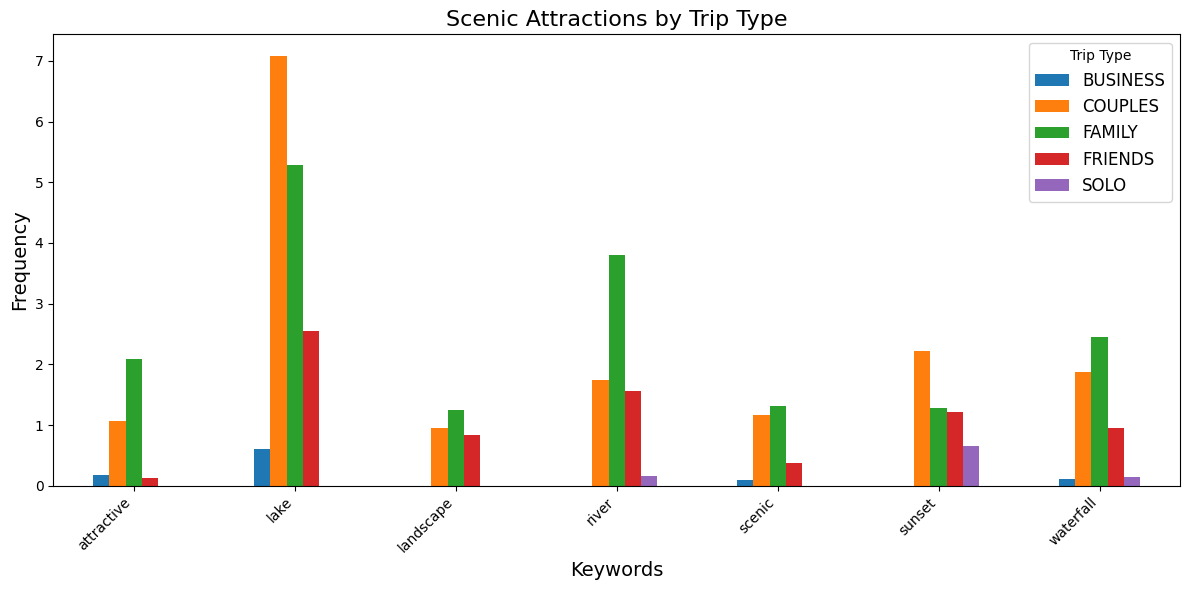

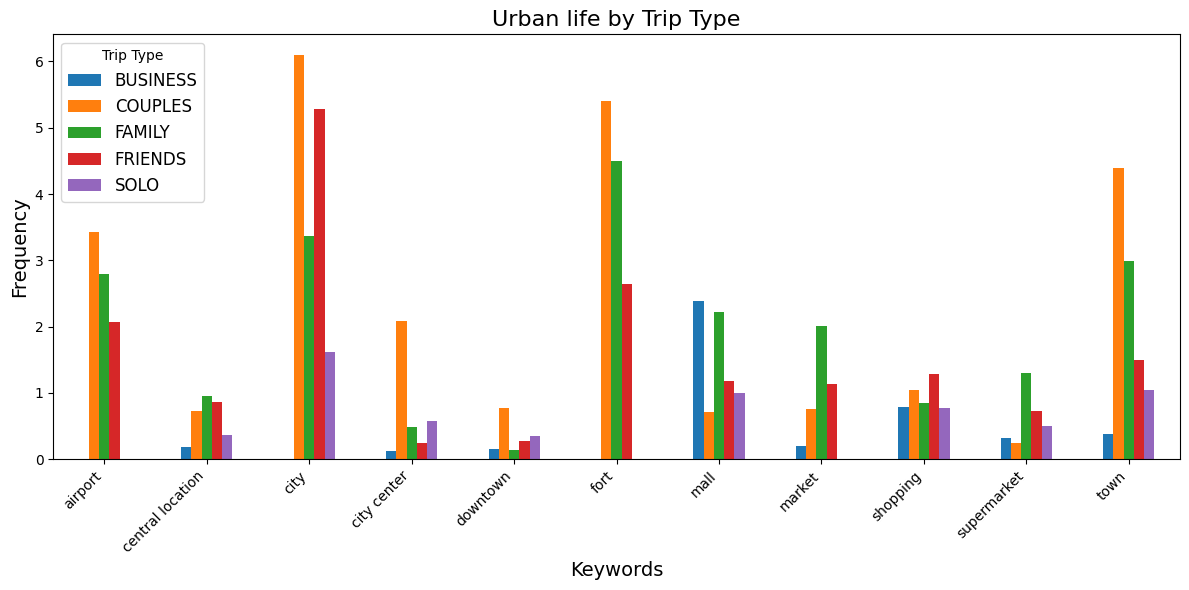

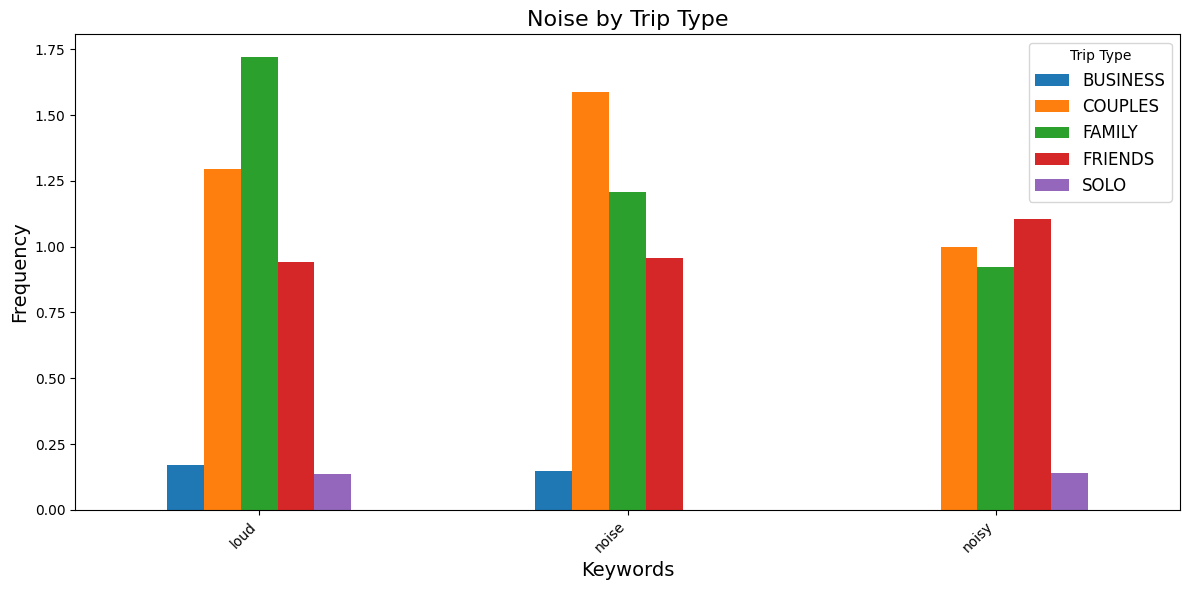

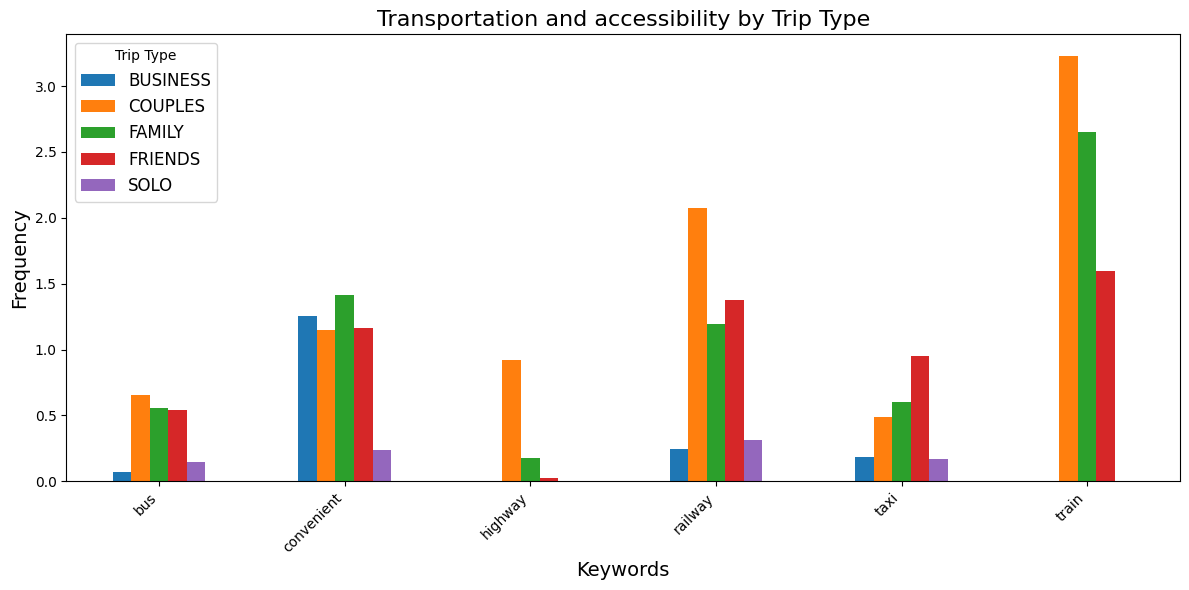

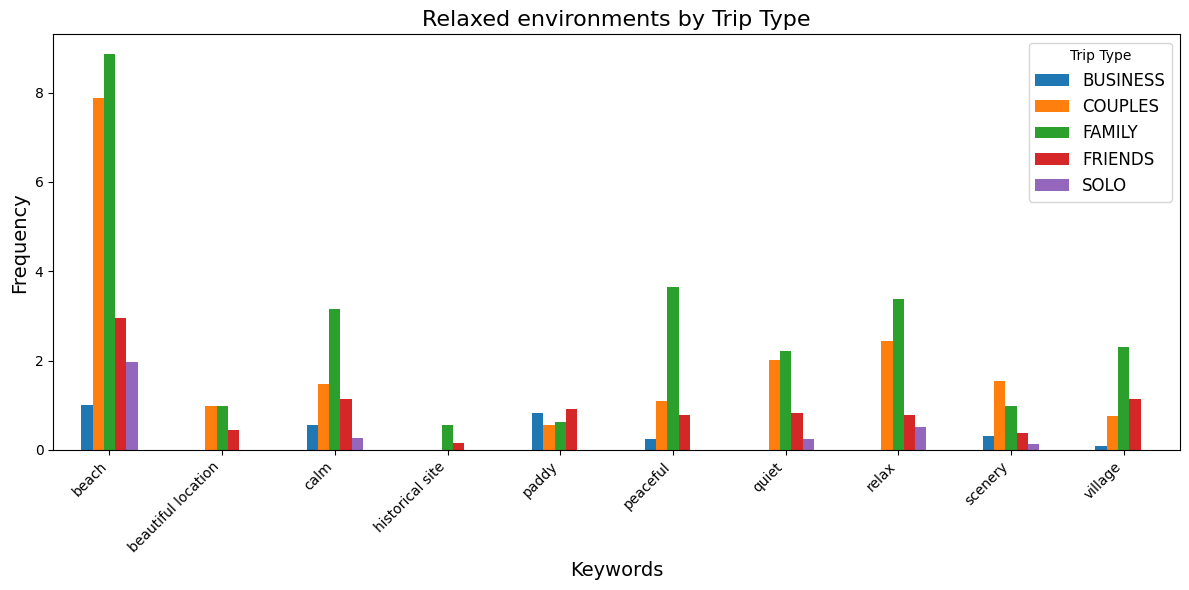

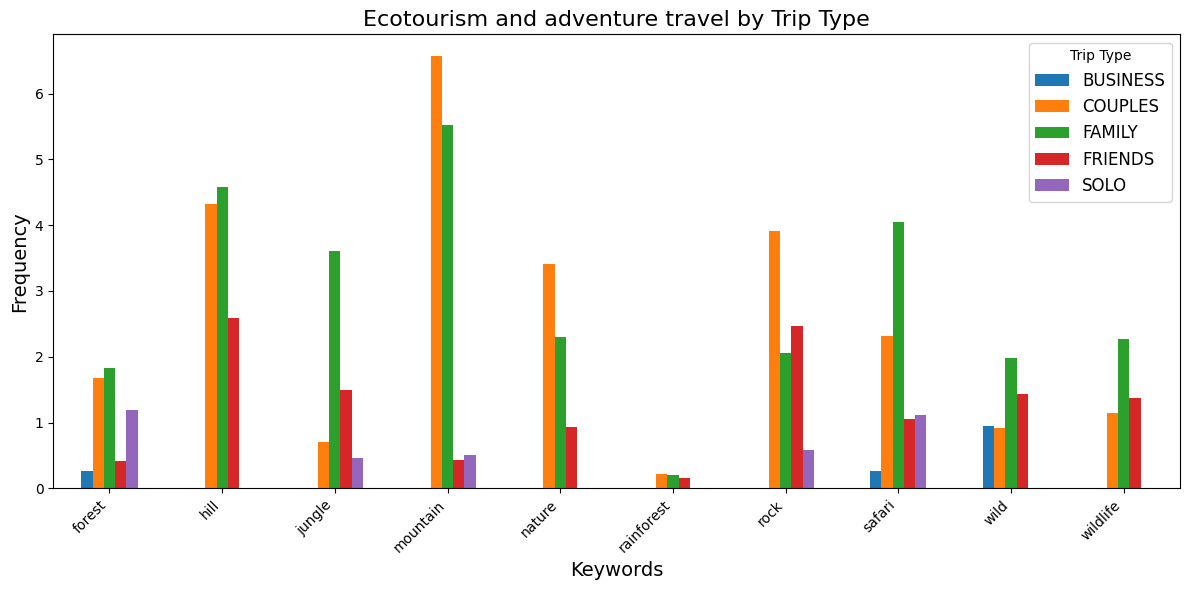

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths for the category data
file_paths = {
    "Scenic Attractions": r"D:\University\FINAL PROJECT 1\Research\Research_3\Scenic Attractions_Count under each hotel with percentile.csv",
    "Urban life": r"D:\University\FINAL PROJECT 1\Research\Research_3\Urban life_Count under each hotel with percentile.csv",
    "Noise":  r"D:\University\FINAL PROJECT 1\Research\Research_3\Noise_Count under each hotel with percentile.csv", 
    "Transportation and accessibility": r"D:\University\FINAL PROJECT 1\Research\Research_3\Transportation and accessibility_Count under each hotel with percentile.csv",
    "Relaxed environments": r"D:\University\FINAL PROJECT 1\Research\Research_3\Relaxed environments_Count under each hotel with percentile.csv",
    "Ecotourism and adventure travel": r"D:\University\FINAL PROJECT 1\Research\Research_3\Ecotourism and adventure travel_Count under each hotel with percentile.csv"
}

# Loop through each file and generate the plot
for category, file_path in file_paths.items():
    # Step 1: Load the dataset
    df = pd.read_csv(file_path)

    # Step 2: Filter out rows where 'Trip Type' is 'NONE'
    df = df[df['Trip Type'] != 'NONE']

    # Step 3: Pivot the data to create a table of frequencies for each keyword by trip type
    pivot_df = df.pivot_table(index='Keyword', columns='Trip Type', values='Frequency', fill_value=0)
    
    # Step 4: Plot the column chart
    pivot_df.plot(kind='bar', figsize=(12, 6))
    
    # Step 5: Customize the plot
    plt.title(f'{category} by Trip Type', fontsize=16)
    plt.xlabel('Keywords', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Trip Type', fontsize=12)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
    
    # Step 6: Show the plot
    plt.show()



Grouped Frequency by Trip Type for Scenic Attractions:
  Trip Type  Frequency
0  BUSINESS   0.999481
1   COUPLES  16.113376
2    FAMILY  17.465486
3   FRIENDS   7.605820
4      SOLO   0.942729


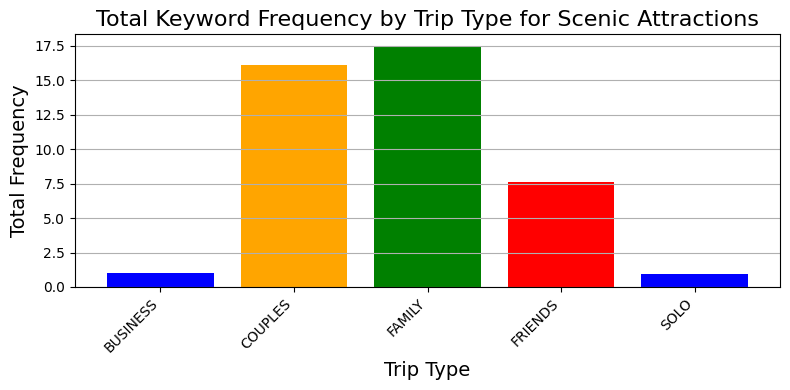

Grouped Frequency by Trip Type for Urban life:
  Trip Type  Frequency
0  BUSINESS   4.523220
1   COUPLES  25.676129
2    FAMILY  21.632149
3   FRIENDS  17.219256
4      SOLO   6.242796


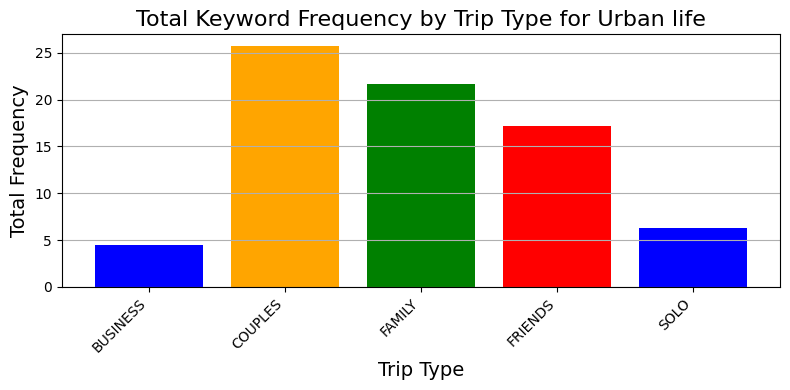

Grouped Frequency by Trip Type for Noise:
  Trip Type  Frequency
0  BUSINESS   0.319101
1   COUPLES   3.882639
2    FAMILY   3.849224
3   FRIENDS   3.006383
4      SOLO   0.276435


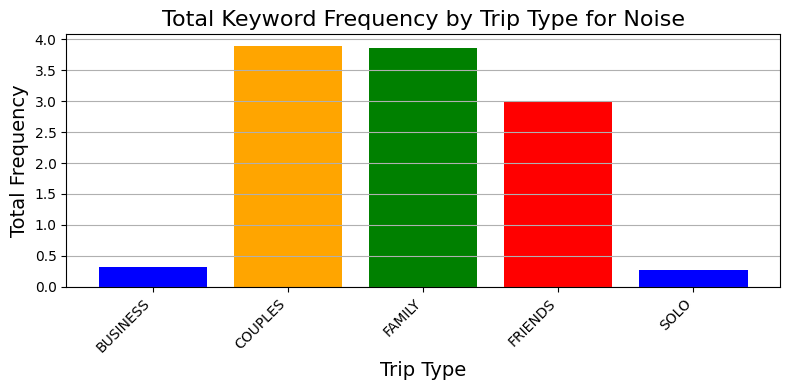

Grouped Frequency by Trip Type for Transportation and accessibility:
  Trip Type  Frequency
0  BUSINESS   1.758835
1   COUPLES   8.512688
2    FAMILY   6.612101
3   FRIENDS   5.648277
4      SOLO   0.868628


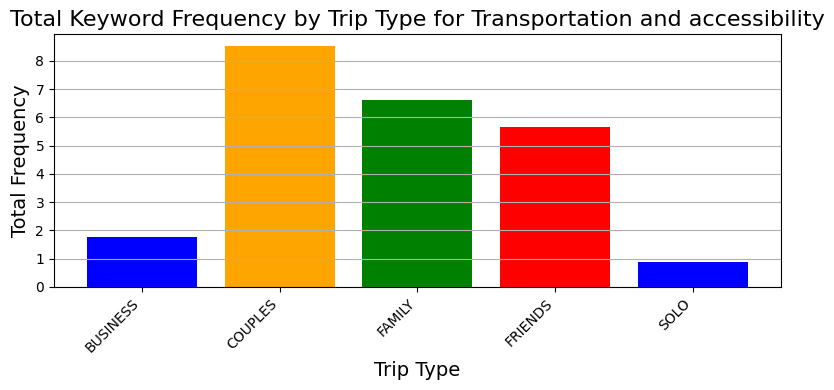

Grouped Frequency by Trip Type for Relaxed environments:
  Trip Type  Frequency
0  BUSINESS   3.028795
1   COUPLES  18.729841
2    FAMILY  26.730350
3   FRIENDS   9.562312
4      SOLO   3.150354


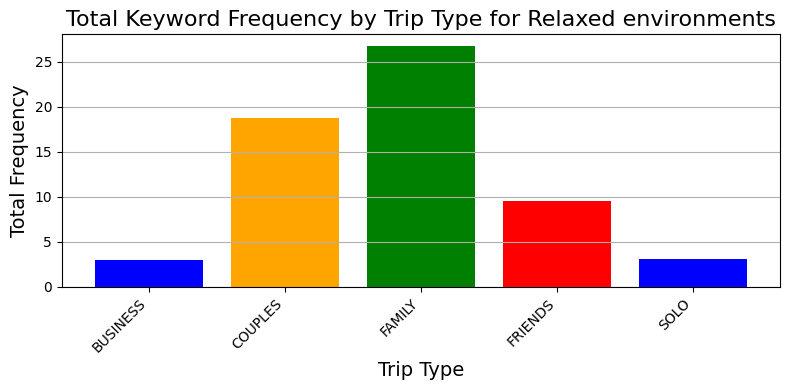

Grouped Frequency by Trip Type for Ecotourism and adventure travel:
  Trip Type  Frequency
0  BUSINESS   1.466613
1   COUPLES  25.190608
2    FAMILY  28.384222
3   FRIENDS  12.335675
4      SOLO   3.877954


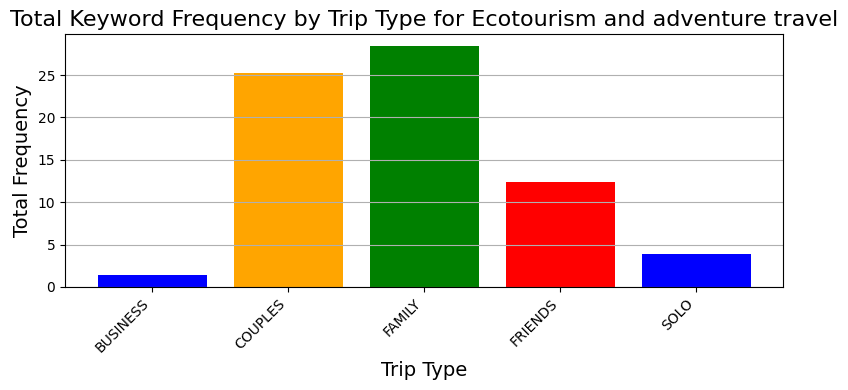

In [15]:
# Loop through each file and generate the grouped frequency and plot
for category, file_path in file_paths.items():
    # Step 1: Load the dataset
    df = pd.read_csv(file_path)
    df = df[df['Trip Type'] != 'NONE']
    # Step 2: Group by 'Trip Type' and sum the 'Frequency'
    grouped_freq = df.groupby('Trip Type')['Frequency'].sum().reset_index()
    
    # Step 3: Print the grouped frequency DataFrame
    print(f"Grouped Frequency by Trip Type for {category}:")
    print(grouped_freq)
    
    # Step 4: Plotting the total frequency by trip type
    plt.figure(figsize=(8, 4))
    plt.bar(grouped_freq['Trip Type'], grouped_freq['Frequency'], color=['blue', 'orange', 'green', 'red'])
    
    # Step 5: Customize the plot
    plt.title(f'Total Keyword Frequency by Trip Type for {category}', fontsize=16)
    plt.xlabel('Trip Type', fontsize=14)
    plt.ylabel('Total Frequency', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')  # Add grid lines for better readability
    
    # Step 6: Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

Total Frequency by Trip Type:
  Trip Type  Frequency                          Category
0  BUSINESS   0.999481                Scenic Attractions
1   COUPLES  16.113376                Scenic Attractions
2    FAMILY  17.465486                Scenic Attractions
3   FRIENDS   7.605820                Scenic Attractions
4      SOLO   0.942729                Scenic Attractions
0  BUSINESS   4.523220                        Urban life
1   COUPLES  25.676129                        Urban life
2    FAMILY  21.632149                        Urban life
3   FRIENDS  17.219256                        Urban life
4      SOLO   6.242796                        Urban life
0  BUSINESS   0.319101                             Noise
1   COUPLES   3.882639                             Noise
2    FAMILY   3.849224                             Noise
3   FRIENDS   3.006383                             Noise
4      SOLO   0.276435                             Noise
0  BUSINESS   1.758835  Transportation and accessibility
1

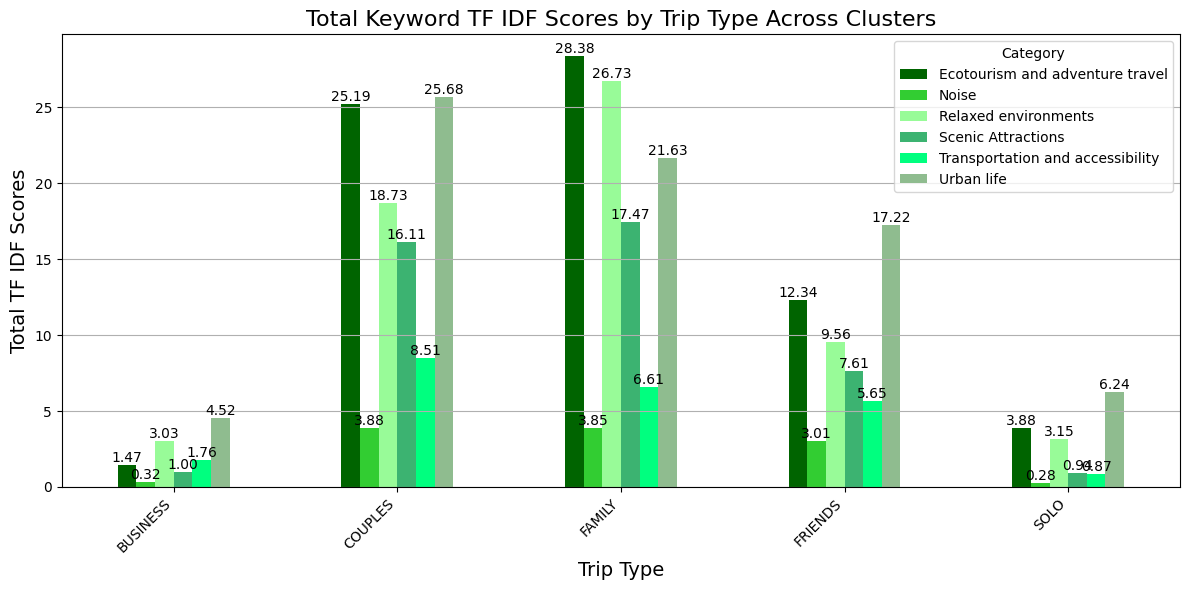

In [18]:
# Create an empty DataFrame to store the aggregated data
total_freq_by_trip_type = pd.DataFrame()

# Loop through each file and aggregate the data
for category, file_path in file_paths.items():
    # Step 1: Load the dataset
    df = pd.read_csv(file_path)
    
    # Filter out rows where Trip Type is 'NONE'
    df = df[df['Trip Type'] != 'NONE']
    
    # Step 2: Group by 'Trip Type' and sum the 'Frequency'
    grouped_freq = df.groupby('Trip Type')['Frequency'].sum().reset_index()
    
    # Add category to the DataFrame for identification
    grouped_freq['Category'] = category
    
    # Step 3: Append to the total frequency DataFrame
    total_freq_by_trip_type = pd.concat([total_freq_by_trip_type, grouped_freq])

# Print the counts of the total frequency by trip type
print("Total Frequency by Trip Type:")
print(total_freq_by_trip_type)

# Step 4: Pivot the data for easier plotting
pivot_freq = total_freq_by_trip_type.pivot_table(index='Trip Type', columns='Category', values='Frequency', fill_value=0)

# Step 5: Plotting the total frequency by trip type
ax = pivot_freq.plot(kind='bar', figsize=(12, 6), color=['#006400', '#32CD32', '#98FB98', '#3CB371', '#00FF7F', '#8FBC8F', '#ADFF2F'])

# Step 6: Customize the plot
plt.title('Total Keyword TF IDF Scores by Trip Type Across Clusters', fontsize=16)
plt.xlabel('Trip Type', fontsize=14)
plt.ylabel('Total TF IDF Scores', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Add grid lines for better readability
plt.legend(title='Category')  # Add legend for clarity

# Step 7: Annotate bars with counts, formatted as floats
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Step 8: Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


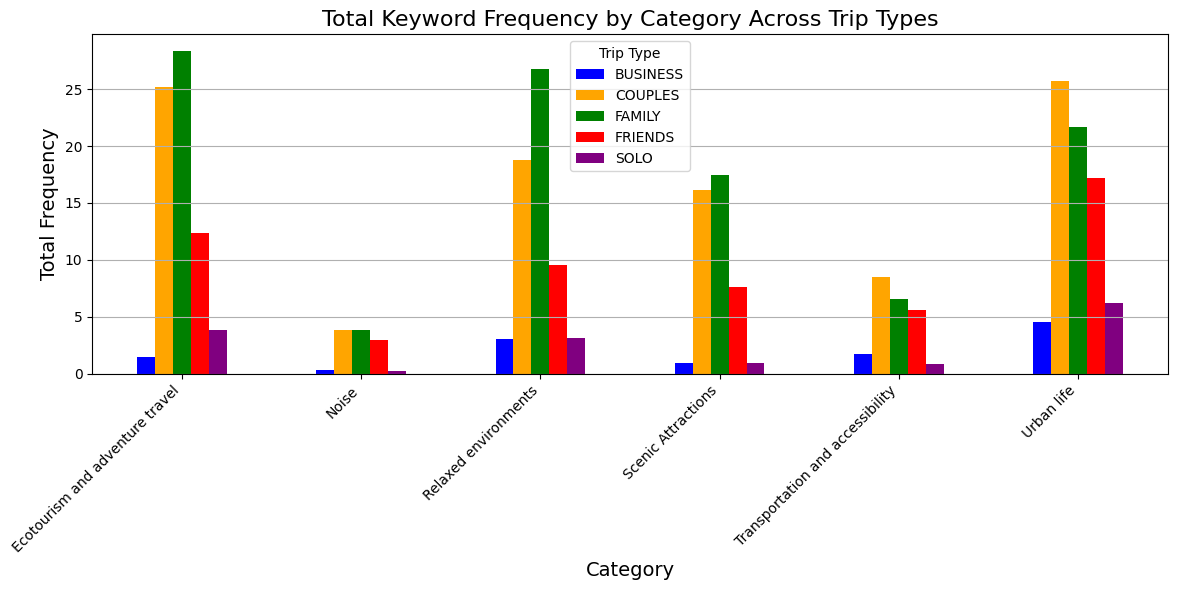

In [39]:
# Create an empty DataFrame to store the aggregated data
total_freq_by_category = pd.DataFrame()

# Loop through each file and aggregate the data
for category, file_path in file_paths.items():
    # Step 1: Load the dataset
    df = pd.read_csv(file_path)
    
    # Filter out rows where Trip Type is 'NONE'
    df = df[df['Trip Type'] != 'NONE']
    
    # Step 2: Group by 'Trip Type' and sum the 'Frequency'
    grouped_freq = df.groupby('Trip Type')['Frequency'].sum().reset_index()
    
    # Add category to the DataFrame for identification
    grouped_freq['Category'] = category
    
    # Step 3: Append to the total frequency DataFrame
    total_freq_by_category = pd.concat([total_freq_by_category, grouped_freq])

# Step 4: Pivot the data for easier plotting
pivot_freq = total_freq_by_category.pivot_table(index='Category', columns='Trip Type', values='Frequency', fill_value=0)

# Step 5: Plotting the total frequency by category
pivot_freq.plot(kind='bar', figsize=(12, 6), color=['blue', 'orange', 'green', 'red', 'purple'])

# Step 6: Customize the plot
plt.title('Total Keyword Frequency by Category Across Trip Types', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Add grid lines for better readability
plt.legend(title='Trip Type')  # Add legend for clarity

# Step 7: Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# Ratings

In [24]:
import pandas as pd

# Load the frequency dataset and the original dataset
counts_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\tfidf_location_terms_filtered.csv")
reviews_df = pd.read_csv(r"D:\University\FINAL PROJECT 1\Research\Preprocessed_Reviews.csv")

# Define categories and their keywords (including bigrams)
categories = {
    'Scenic Attractions': ['lake', 'scenic', 'river', 'sunset', 'waterfall', 'landscape', 'attractive'],
    'Urban life': ['fort', 'city', 'town', 'mall', 'airport', 'shopping', 'supermarket', 'market', 'downtown', 'central location', 'city center'],
    'Noise': ['noisy', 'noise', 'loud'],
    'Transportation and accessibility': ['train', 'railway', 'bus', 'taxi', 'convenient', 'highway'],
    'Relaxed environments': ['quiet', 'peaceful', 'relax', 'calm', 'beautiful location', 'scenery', 'beach', 'paddy', 'village', 'historical site'],
    'Ecotourism and adventure travel': ['safari', 'hill', 'rock', 'forest', 'jungle', 'wild', 'nature', 'mountain', 'rainforest', 'wildlife']
}
# Function to generate data for each category
def get_category_data(category_keywords, category_name):
    # Initialize a list to store the summary data
    frequency_summary = []

    # Iterate through each row in the counts_df and match with the relevant terms
    for index, row in counts_df.iterrows():
        matched_terms = [term for term in category_keywords if term in row and row[term] > 0]
        if matched_terms:
            hotel_name = row['Hotel names']
            matching_review = reviews_df[reviews_df['Hotel names'] == hotel_name]
            

            
            # If a matching review exists
            if not matching_review.empty:
                location = matching_review.iloc[0]['Location']
                rating = matching_review.iloc[0]['Rating']
                travel_type = matching_review.iloc[0]['Trip Type']
                
                # Prepare data for each matched term
                for term in matched_terms:
                    frequency_summary.append({
                        'Hotel Name': hotel_name,
                        'Location': location,
                        'Rating': rating,
                        'Keyword': term,
                        'Frequency': row[term],
                        'Trip Type': travel_type
                    })

    # Convert the list to a DataFrame
    frequency_df = pd.DataFrame(frequency_summary)
    
    # Save the DataFrame to a CSV file
    output_path = f"D:\\University\\FINAL PROJECT 1\\Research\\Research_3\\{category_name}_rating with percentile.csv"
    frequency_df.to_csv(output_path, index=False)

    print(f"{category_name} category data saved to {output_path}")

# Generate and save CSV files for each category
for category_name, keywords in categories.items():
    get_category_data(keywords, category_name)





Scenic Attractions category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Scenic Attractions_rating with percentile.csv
Urban life category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Urban life_rating with percentile.csv
Noise category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Noise_rating with percentile.csv
Transportation and accessibility category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Transportation and accessibility_rating with percentile.csv
Relaxed environments category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Relaxed environments_rating with percentile.csv
Ecotourism and adventure travel category data saved to D:\University\FINAL PROJECT 1\Research\Research_3\Ecotourism and adventure travel_rating with percentile.csv
